# Evaluation Project - 2

### HR Analytics Project- Understanding the Attrition in HR
   
   ### Problem Statement:
        Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

  ### HR Analytics

    Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

   ### Attrition in HR

    Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

    How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

   ### Attrition affecting Companies

    A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

### DATA PREPARATION: Preparation of Data for EDA
    - Importing Data
    - Checknig Datatypes 
    - checking for std, irregularities
    - checknig for irregular vlaues/ missing values

In [375]:
#IMPORTS

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [376]:
## Impoting Data

data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [377]:
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [378]:
data.keys()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [379]:
for i in data.columns:
    print(data[i].value_counts())

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     2

#### OBSERVATIONS:
    - Attrition , Target VAriable has imbalanced number of classes.
    - THree types of Bussiness Travel, Rarely, Frequently, non travel.
    - THree TYpes of Department, HR , Research and Sales.
    - Employee Count is 1 for all the Data, Same value for all, Can DROP this Feature .
    - Employee Number is Unique for all, like Employee ID.
    - Over18 has all the Values Y as all the employeedetails are for 18+, can drop the feature as all the rows have same value for OVer18.
    - Standard Hours are Same for all employee , Can drop this column.
    
    
  ##### DROPPING EmployeeCount, Over18, Standard Hours.

In [380]:
### Dropping features with same values for all rows.

data.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],inplace=True,axis=1)

In [381]:
category_columns = ['Attrition', 'BusinessTravel','Department','Education',
                    'EducationField','EnvironmentSatisfaction','Gender',
                    'JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked',
                    'OverTime',
                   'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                   'TrainingTimesLastYear','WorkLifeBalance','PercentSalaryHike',
                    'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

continous_columns = ['Age','DailyRate','DistanceFromHome','HourlyRate',
                     'MonthlyIncome', 'MonthlyRate',
                    'TotalWorkingYears', 'YearsAtCompany'
                    ]

In [382]:
data[continous_columns].describe()

Age    DailyRate  DistanceFromHome   HourlyRate  MonthlyIncome  \
count  1470.000000  1470.000000       1470.000000  1470.000000    1470.000000   
mean     36.923810   802.485714          9.192517    65.891156    6502.931293   
std       9.135373   403.509100          8.106864    20.329428    4707.956783   
min      18.000000   102.000000          1.000000    30.000000    1009.000000   
25%      30.000000   465.000000          2.000000    48.000000    2911.000000   
50%      36.000000   802.000000          7.000000    66.000000    4919.000000   
75%      43.000000  1157.000000         14.000000    83.750000    8379.000000   
max      60.000000  1499.000000         29.000000   100.000000   19999.000000   

        MonthlyRate  TotalWorkingYears  YearsAtCompany  
count   1470.000000        1470.000000     1470.000000  
mean   14313.103401          11.279592        7.008163  
std     7117.786044           7.780782        6.126525  
min     2094.000000           0.000000        0.000000  
25%     8047.000000           6.000000        3.000000  
50%    14235.500000          10.000000        5.000000  
75%    20461.500000          15.000000        9.000000  
max    26999.000000          40.000000       40.000000

In [383]:
(data.isnull()).sum(axis=0)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [384]:
len(category_columns), len(continous_columns)

(23, 8)

### EXPLORATORY DATA ANALYSIS
    - UNIVARIATNE ANALYSIS
    - BIVARIANTE ANALYSIS
    - MULTIVARIATNE ANALYSIS

In [385]:
data['Attrition'].value_counts()/len(data)*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

In [386]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

<AxesSubplot:xlabel='Attrition', ylabel='count'>

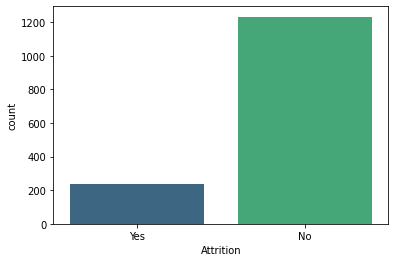

In [387]:
plt.figure(figsize=(6,4))
sb.countplot(data['Attrition'],palette='viridis')

#### OBSERVATIONS:
        ------------- IMBALANCED TARGET CLASS, need to do OverSampling with SMOTE ANALYSIS ---------------

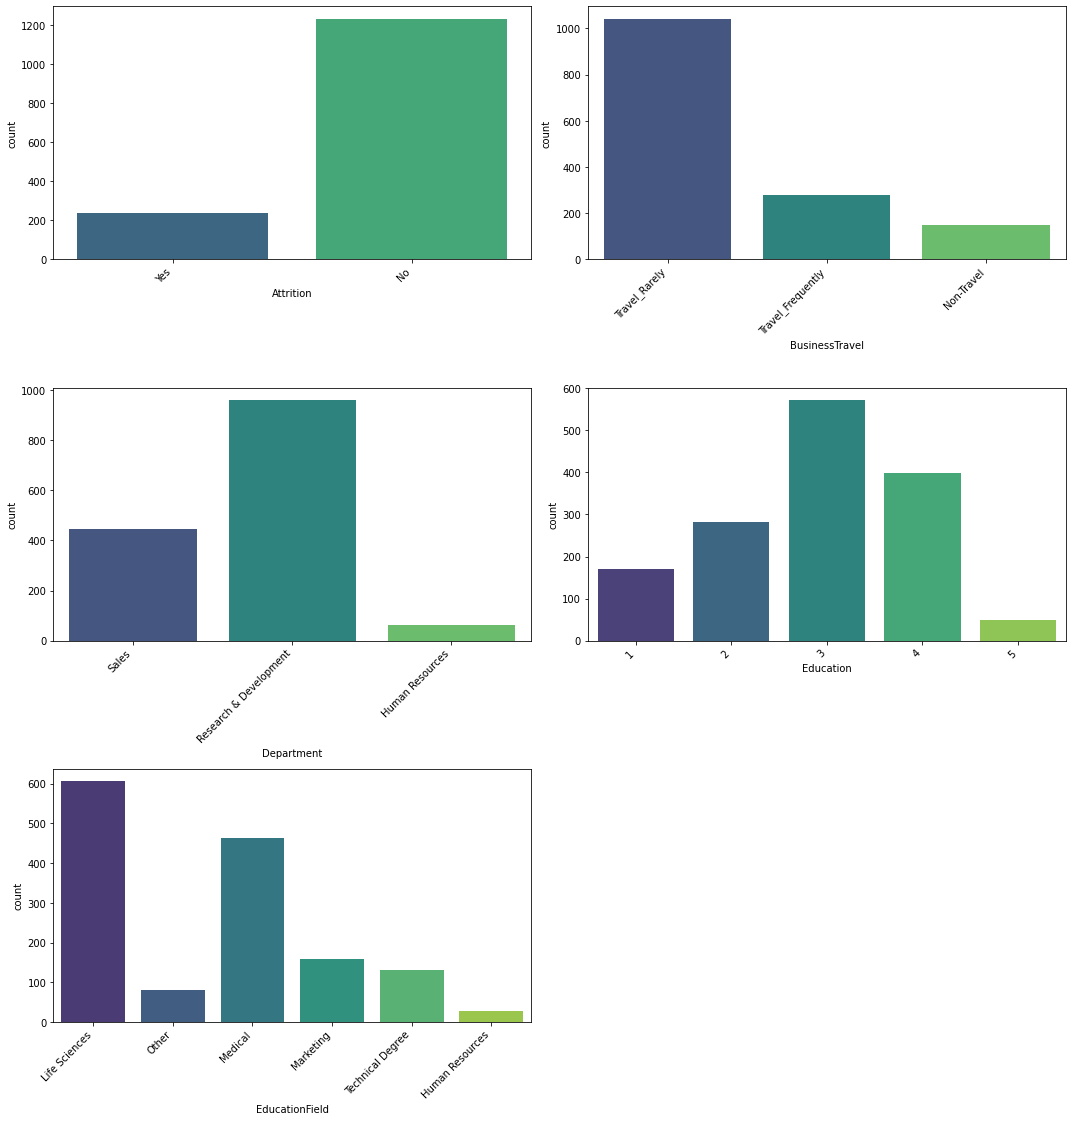

In [388]:
c = 1
plt.figure(figsize=(15,25))
for i in category_columns[:5] : 
   
    plt.subplot(5,2,c)
    c= c+1
    sb.countplot(data[i],palette='viridis')
    plt.xticks( rotation=45, horizontalalignment='right')
    plt.xlabel(i)
    
    plt.tight_layout()

#### OBSERVATIONS:
    - Employees Mostly belong to LifeSciences/ Medical.
    - High Count of Employees in Research & Development.
    - Highest count of Employee belong to  3 year  education.
    - Highest Count of Employee Travel RArely.

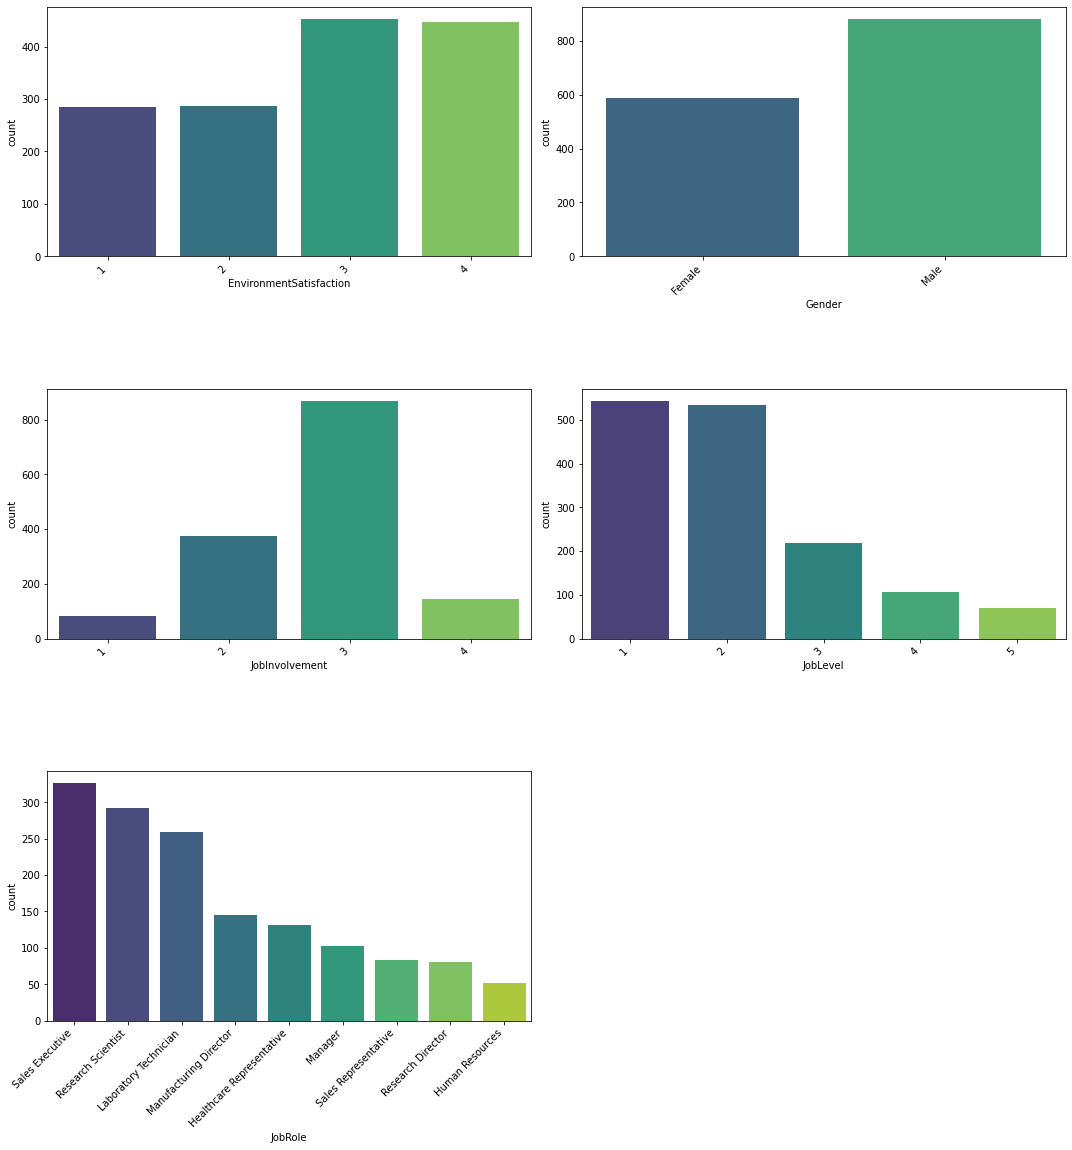

In [389]:
c = 1
plt.figure(figsize=(15,25))
for i in category_columns[5:10] : 
   
    plt.subplot(5,2,c)
    c= c+1
    sb.countplot(data[i],palette='viridis')
    plt.xticks( rotation=45, horizontalalignment='right')
    plt.xlabel(i)
    
    plt.tight_layout()

#### OBSERVATIONS:
    - Highest Count of Employees belong to Sales Executive/ Research Scienctist / Labaratory Technician.
    - High Count of jobInvolvment with level 3.
    - Highest Employee with Job level 1,2.
    - Highest Employee with Envioriment Satisfaction 3,4.
    - Male Count higher than Female.

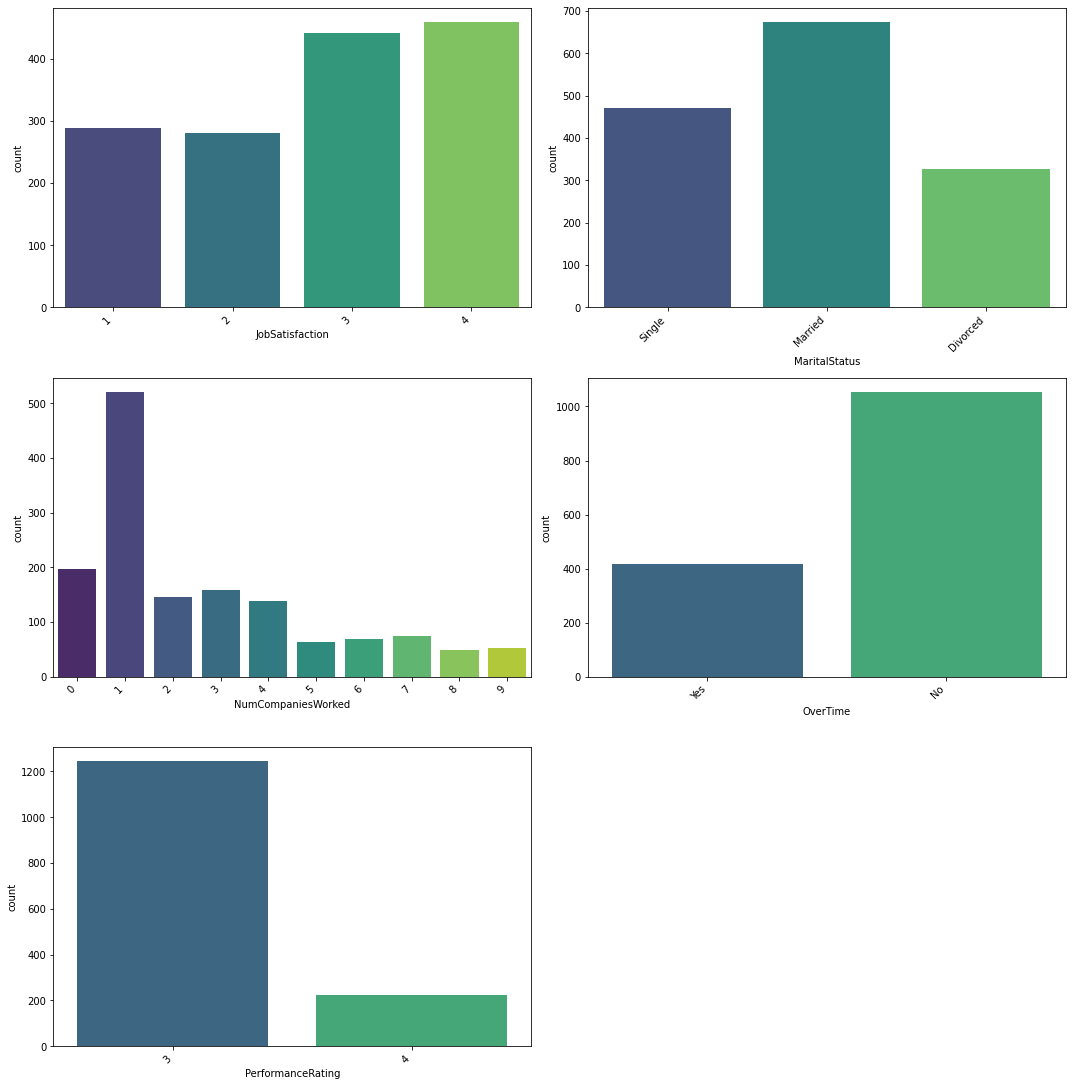

In [390]:
c = 1
plt.figure(figsize=(15,25))
for i in category_columns[10:15] : 
   
    plt.subplot(5,2,c)
    c= c+1
    sb.countplot(data[i],palette='viridis')
    plt.xticks( rotation=45, horizontalalignment='right')
    plt.xlabel(i)
    
    plt.tight_layout()

#### OBSERVATION:
    - Married employees highest count in Data.
    - Count of PErformance Rating with 3 is very high.
    - Mostly numofCompaniesWorked is with 1.
    - jobStatisfaction with 3,4 has highest count.
    - OverTime with No has Highest Count.

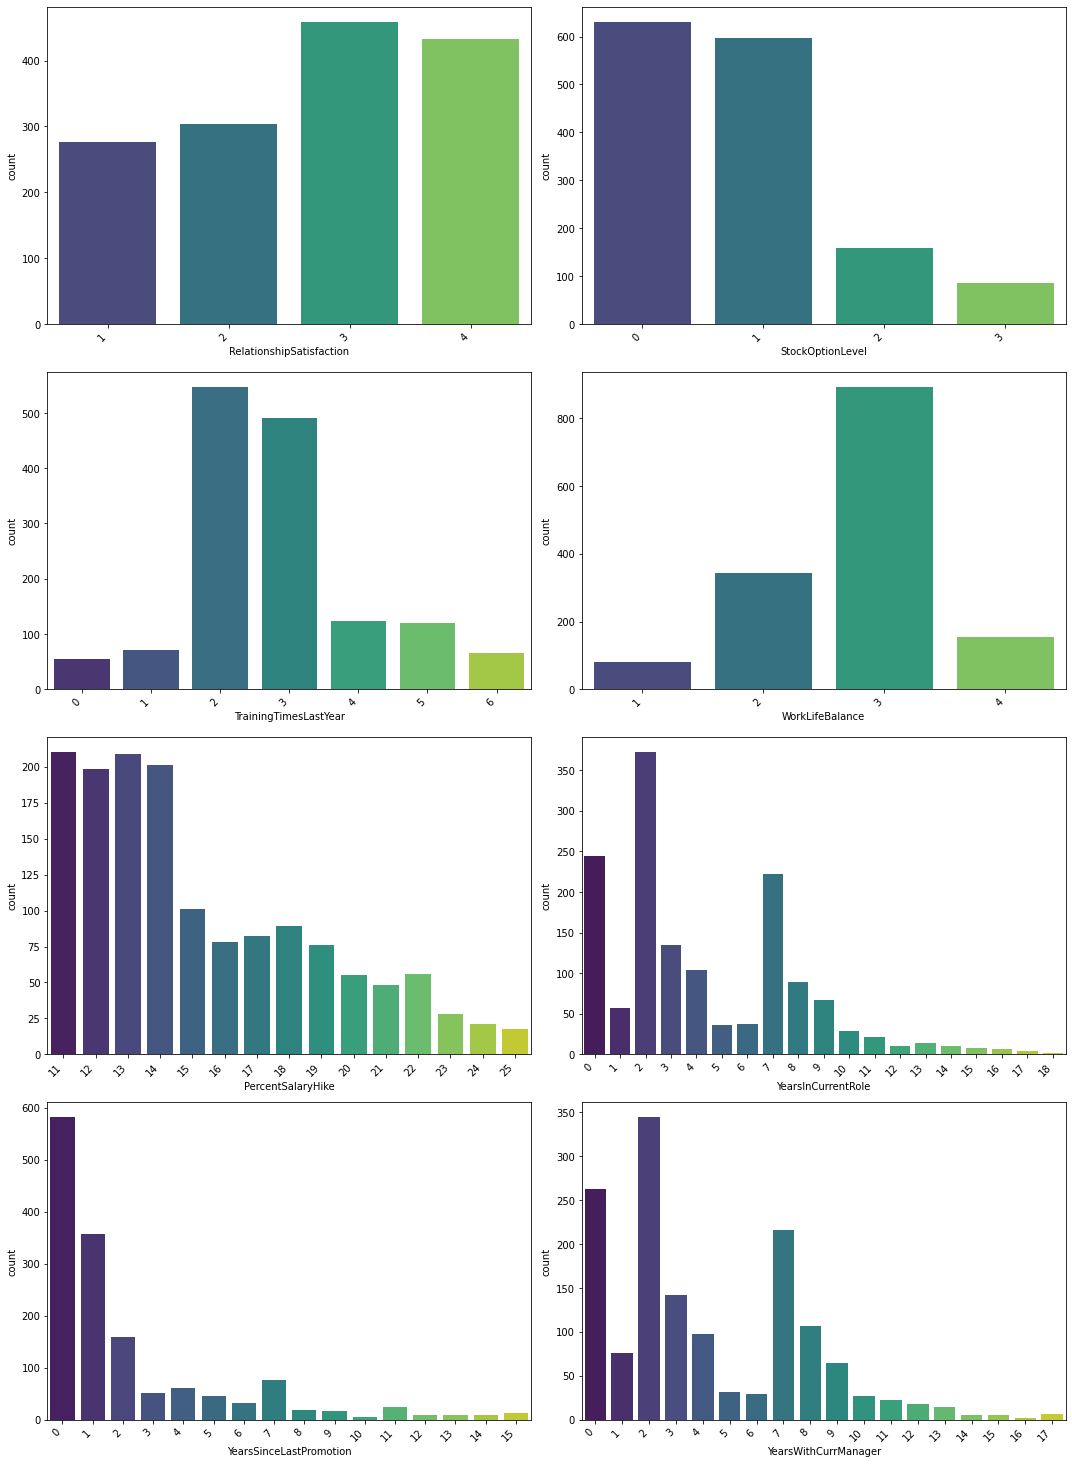

In [391]:
c = 1
plt.figure(figsize=(15,25))
for i in category_columns[15:] : 
   
    plt.subplot(5,2,c)
    c= c+1
    sb.countplot(data[i],palette='viridis')
    plt.xticks( rotation=45, horizontalalignment='right')
    plt.xlabel(i)
    
    plt.tight_layout()

#### OBSERVATIONS:
    - Training TimesLastYear with 2,3 has highest Count.
    - Most Employees have WorkLifeBalance with 3.
    - Employees have Highest count for Stock Option with 0,1.
    - Relationship Satisfaction 3,4 has highest count.

In [392]:
data.groupby('Attrition').mean()

Age   DailyRate  DistanceFromHome  Education  \
Attrition                                                       
No         37.561233  812.504461          8.915653   2.927007   
Yes        33.607595  750.362869         10.632911   2.839662   

           EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Attrition                                                                  
No                        2.771290   65.952149        2.770479  2.145985   
Yes                       2.464135   65.573840        2.518987  1.637131   

           JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
Attrition                                  ...                      
No                2.778589    6832.739659  ...           3.153285   
Yes               2.468354    4787.092827  ...           3.156118   

           RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
Attrition                                                                  
No                         2.733982          0.845093          11.862936   
Yes                        2.599156          0.527426           8.244726   

           TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
Attrition                                                           
No                      2.832928         2.781022        7.369019   
Yes                     2.624473         2.658228        5.130802   

           YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
Attrition                                                                     
No                   4.484185                 2.234388              4.367397  
Yes                  2.902954                 1.945148              2.852321  

[2 rows x 23 columns]

In [393]:
from plotnine import *

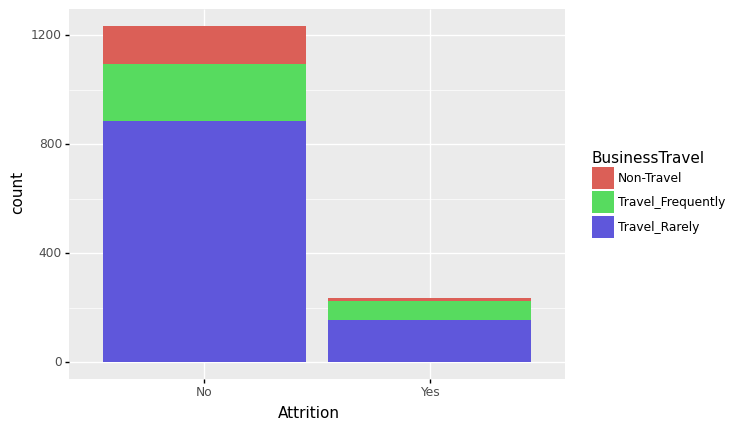

<ggplot: (76635682274)>

In [394]:
    ggplot(data, aes(x='Attrition', fill = 'BusinessTravel')) + \
    geom_bar(stat = 'count')



#### OBSERVATIONS  : 
    - Travel Rarely has highest count in Attrition Yes/ No, probabity of Bussiness Travel Rarely is Highest in Data and  in No Attrition.
    - If a bussiness Travel is Non-Travel, High probability of having Attrition No.
    

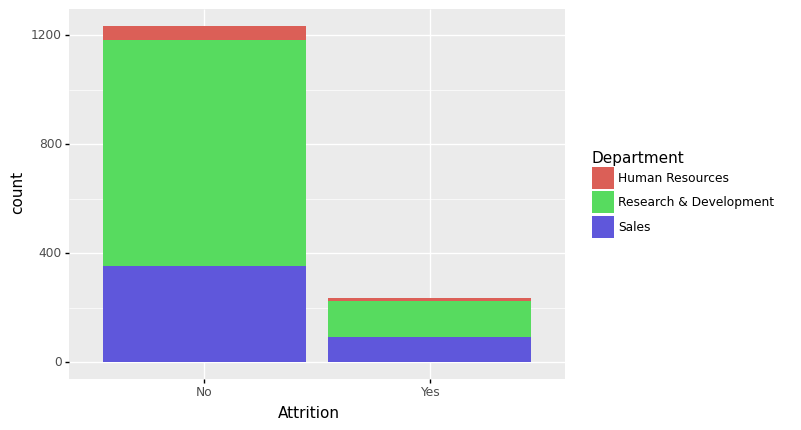

<ggplot: (76635258272)>

In [395]:
ggplot(data, aes(x='Attrition', fill = 'Department')) + geom_bar(stat = 'count')


#### OBSERVATIONS :
    - High Probabilty of Research & developemnt to bleong to Attrition No.
-

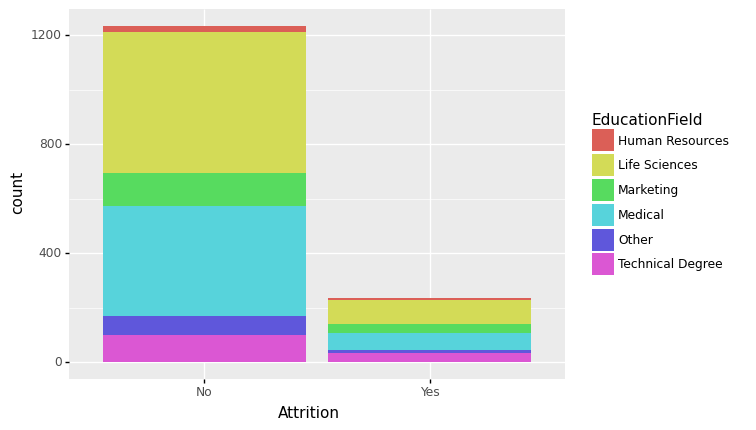

<ggplot: (76627824496)>

In [396]:
ggplot(data, aes(x='Attrition', fill = 'EducationField')) + geom_bar(stat = 'count')

#### OBSERVATIONS:
    - High Probability of Medical / Life Sciences Education Field Bieng

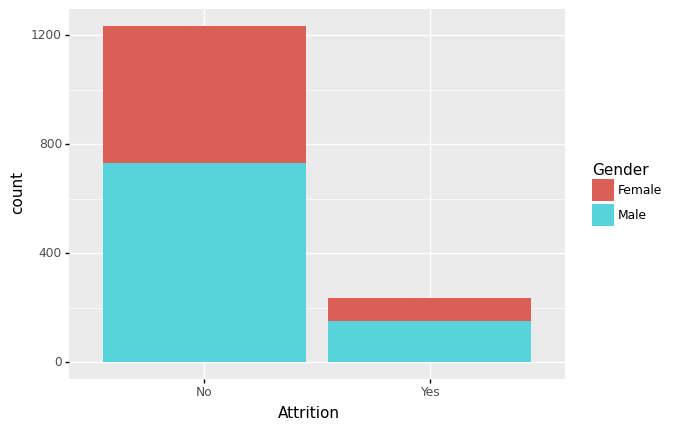

<ggplot: (76626519775)>

In [397]:
ggplot(data, aes(x='Attrition', fill = 'Gender')) + geom_bar(stat = 'count')


#### OBSERVATIONS:
    - Male And Female are approximately equal in both the Attritions.

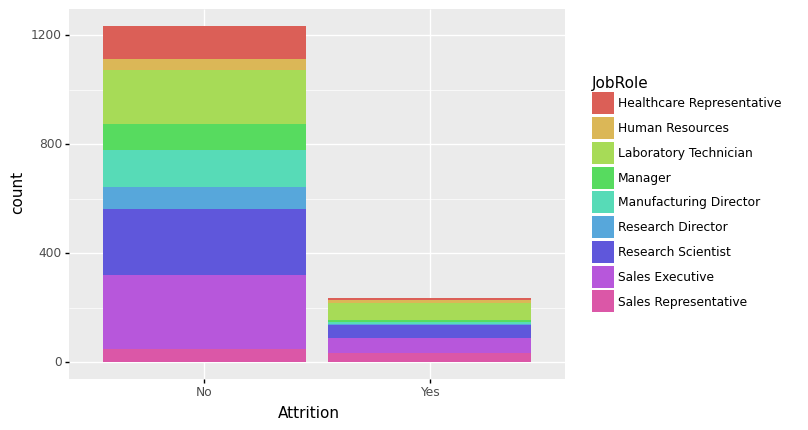

<ggplot: (76626335482)>

In [398]:
ggplot(data, aes(x='Attrition', fill = 'JobRole')) + geom_bar(stat = 'count')


#### OBSERVATIONS:
    - Sales Reprentative have equal probaility/ distribution both the Attritions.
    - OTher Job Roles belong more in No Attrition .

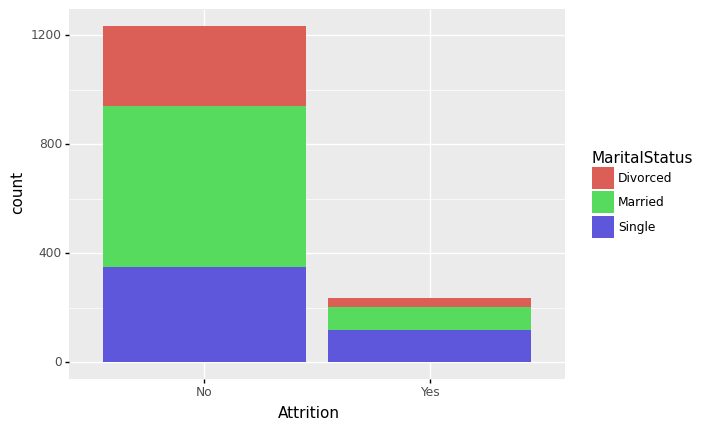

<ggplot: (76621141252)>

In [399]:
ggplot(data, aes(x='Attrition', fill = 'MaritalStatus')) + \
    geom_bar(stat = 'count')


#### OBSERVATIONS:
    - No Attrition has HIgh count of Married.
    - Yes Attrition has high count of Single.

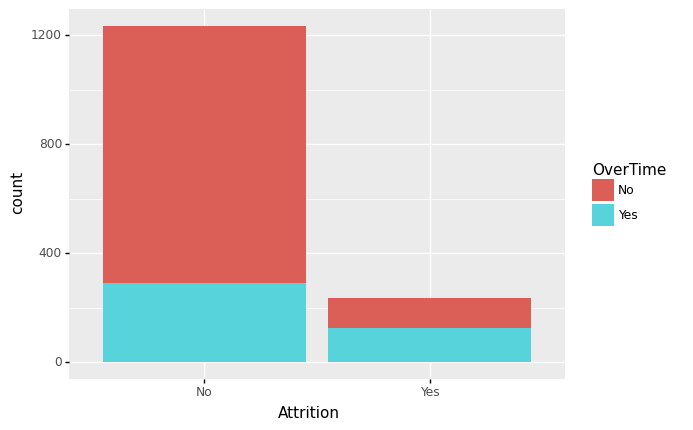

<ggplot: (76624840439)>

In [400]:
ggplot(data, aes(x='Attrition', fill = 'OverTime')) + geom_bar(stat = 'count')


#### OBSERVATIONS 
    - OVer TIme Yes/No is equally spread in Yes Attrition. Whereas In Attrition, No overtime workers are more.
    - High relation between No over time worker with No attrition.

In [401]:
category_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'PercentSalaryHike',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

<AxesSubplot:xlabel='Education', ylabel='count'>

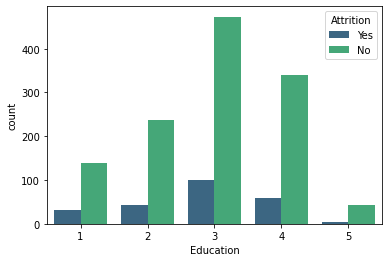

In [402]:
sb.countplot(data['Education'],hue=data['Attrition'],palette='viridis')

#### OBSERVATIONS:
    - Yes/No Attrition has highest of Education 3,4 highly belong
    - probability of Eduction 3,4 belong to No attrition .
    - Attrition No has high probabilty for  Education 5.

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

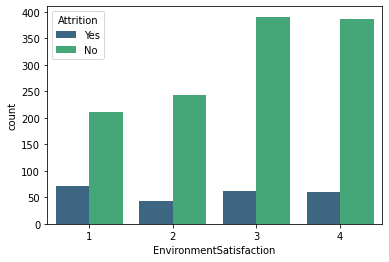

In [403]:
sb.countplot(data['EnvironmentSatisfaction'],hue=data['Attrition'],palette='viridis')

#### OBSERVATIONS:
    - EnvironmentSatisfaction 3,4 have high probabilty to belong No Attrition.
    - Yes Attrition  have EnvironmentSatisfaction 1 highest.
  
       

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

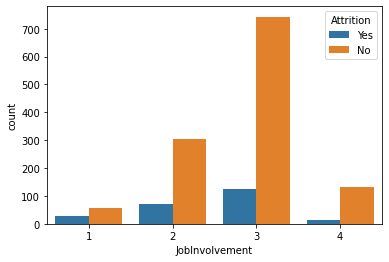

In [404]:
sb.countplot(data['JobInvolvement'],hue=data['Attrition'])

### OBSERVATIONS:
    - Yes/No rition has highest count for JobInvolvement 3.
    - as the Job INvolvement increase , probability of it to bleonging to No attrition also increases.

In [405]:
data[data['JobLevel']==1]['Attrition'].value_counts(),data[data['JobLevel']==2]['Attrition'].value_counts(),data[data['JobLevel']==3]['Attrition'].value_counts(),data[data['JobLevel']==4]['Attrition'].value_counts(),data[data['JobLevel']==5]['Attrition'].value_counts(),

(No     400
 Yes    143
 Name: Attrition, dtype: int64,
 No     482
 Yes     52
 Name: Attrition, dtype: int64,
 No     186
 Yes     32
 Name: Attrition, dtype: int64,
 No     101
 Yes      5
 Name: Attrition, dtype: int64,
 No     64
 Yes     5
 Name: Attrition, dtype: int64)

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

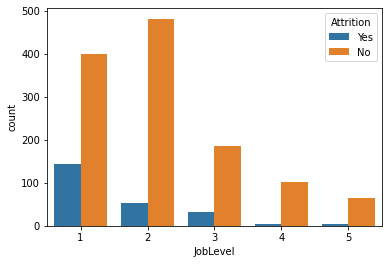

In [406]:
sb.countplot(data['JobLevel'],hue=data['Attrition'])

#### OBSERVATION:
    - AS the Job level increases from 1 to 5, Probability of it to belonging to Attrition No also increases.
    - AS we SEE , JOb level 1 has probabilty of YES:NO attrition 74% : 26%, Job level 2 has probability of 90% , 10 % ,
       Job level 3 has 85%,15%, ,    Job level 4 has 95%,5%,  Job level 5 has 92%,5%.
    
    
    WE CAN OBSERVE FOR LOW JOBLEVELS< PROBABILITY DIFFERENCE IS  LOWER THAN HIGH JOBLEVELS WHEre probabiltyies are 90%+ for NO ATTRITION.

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

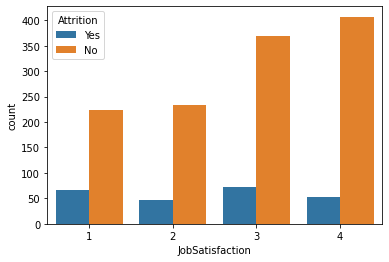

In [407]:
sb.countplot(data['JobSatisfaction'],hue=data['Attrition'])   

#### OBSERVATIONS:  
    - AS THe jobStatisfaction increases, probability of the data to belong in No Attrition Increases.
    - 

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

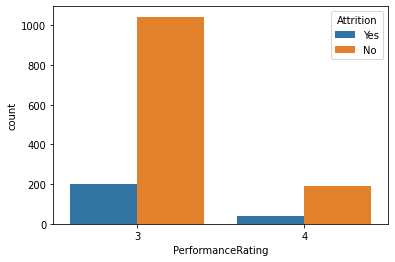

In [408]:
sb.countplot(data['PerformanceRating'],hue=data['Attrition'])

#### OBSERVATIONS:
        - Probability of 3,4 belonging to Attrtion No is Higher.
    

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

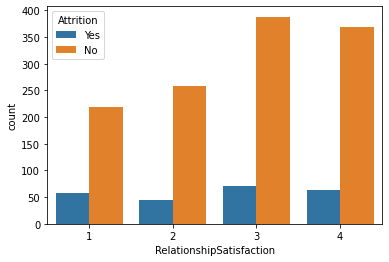

In [409]:
sb.countplot(data['RelationshipSatisfaction'],hue=data['Attrition'])

#### OBSERVATIONS:
    - AS the Relationship Satisfaction increases, probability increases to belong to No Attrtion.
    - Yes Attrition have almost equal distribution of all the RelationshipSatisfaction

In [410]:
data[data['StockOptionLevel']==2]['Attrition'].value_counts()

No     146
Yes     12
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

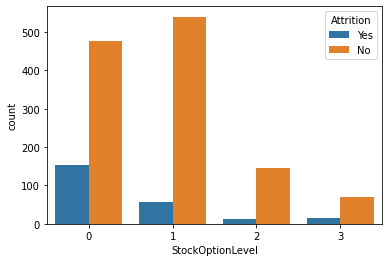

In [411]:
sb.countplot(data['StockOptionLevel'],hue=data['Attrition'])

#### OBSERVATIONS:
    - IN Yes Attrtion, StockOption level 1 has highest count.
    - High probabibltiy of Stock option level 1,2 to belong to No Attrition. more than 90%+ probability.

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

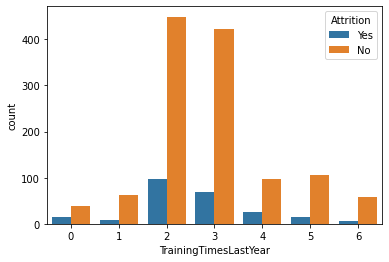

In [412]:
sb.countplot(data['TrainingTimesLastYear'],hue=data['Attrition'])

#### OBSERVATIONS:
    - In Attrition variable, Training timeslast year 2,3 takes highest count.

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

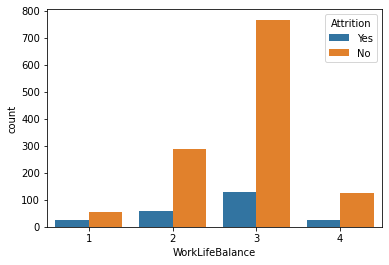

In [413]:
sb.countplot(data['WorkLifeBalance'],hue=data['Attrition'])

#### OBSERVATIONS:
    -- Worklifebalance probability of 3 is highest to belong to No Attrition.
    
    


<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

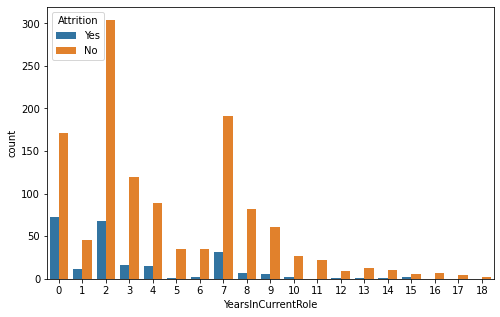

In [414]:
plt.figure(figsize=(8,5))
sb.countplot(data['YearsInCurrentRole'],hue=data['Attrition'])

#### OBSERVATIONS:

    --- For Yes/No, Attrition probability of belonging to 0,2,7 is high.
    --- for YEARS in CurretnRole Higher , Attrition PRobabiltyi for No increases.

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

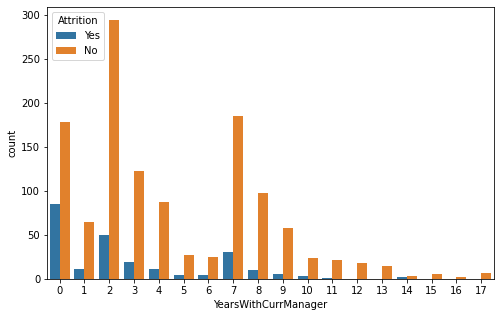

In [415]:
plt.figure(figsize=(8,5))
sb.countplot(data['YearsWithCurrManager'],hue=data['Attrition'])

#### OBSERVATIONS :
    - For Lower  vlaue for Yearswith CurretnManager, probability between yes/no attrition is less than higher vlaue of Years with currewtn Manager, PRobaibltiy increases.

<AxesSubplot:xlabel='Attrition', ylabel='YearsInCurrentRole'>

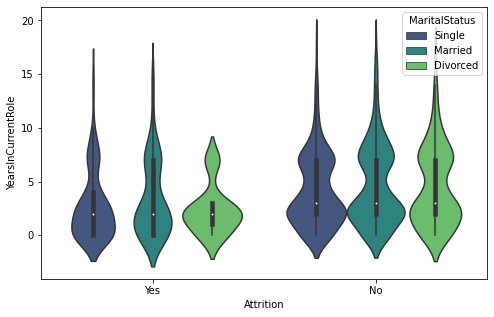

In [416]:
plt.figure(figsize=(8,5))
sb.violinplot(data['Attrition'],data['YearsInCurrentRole'],hue=data['MaritalStatus'],palette='viridis')

#### OBSERVATIONS:
    - IN YES ATTRITION, Divorced has wide range / higher concentrated between 0-5 Years in CurretnRole.
    - WE can Say, Divorced have concetnrated values than other martial status with 0-5 years in Curretn Role 
    
    
#### VISUALIZING CONTINOUS FEATURES

In [417]:
continous_columns

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'TotalWorkingYears',
 'YearsAtCompany']

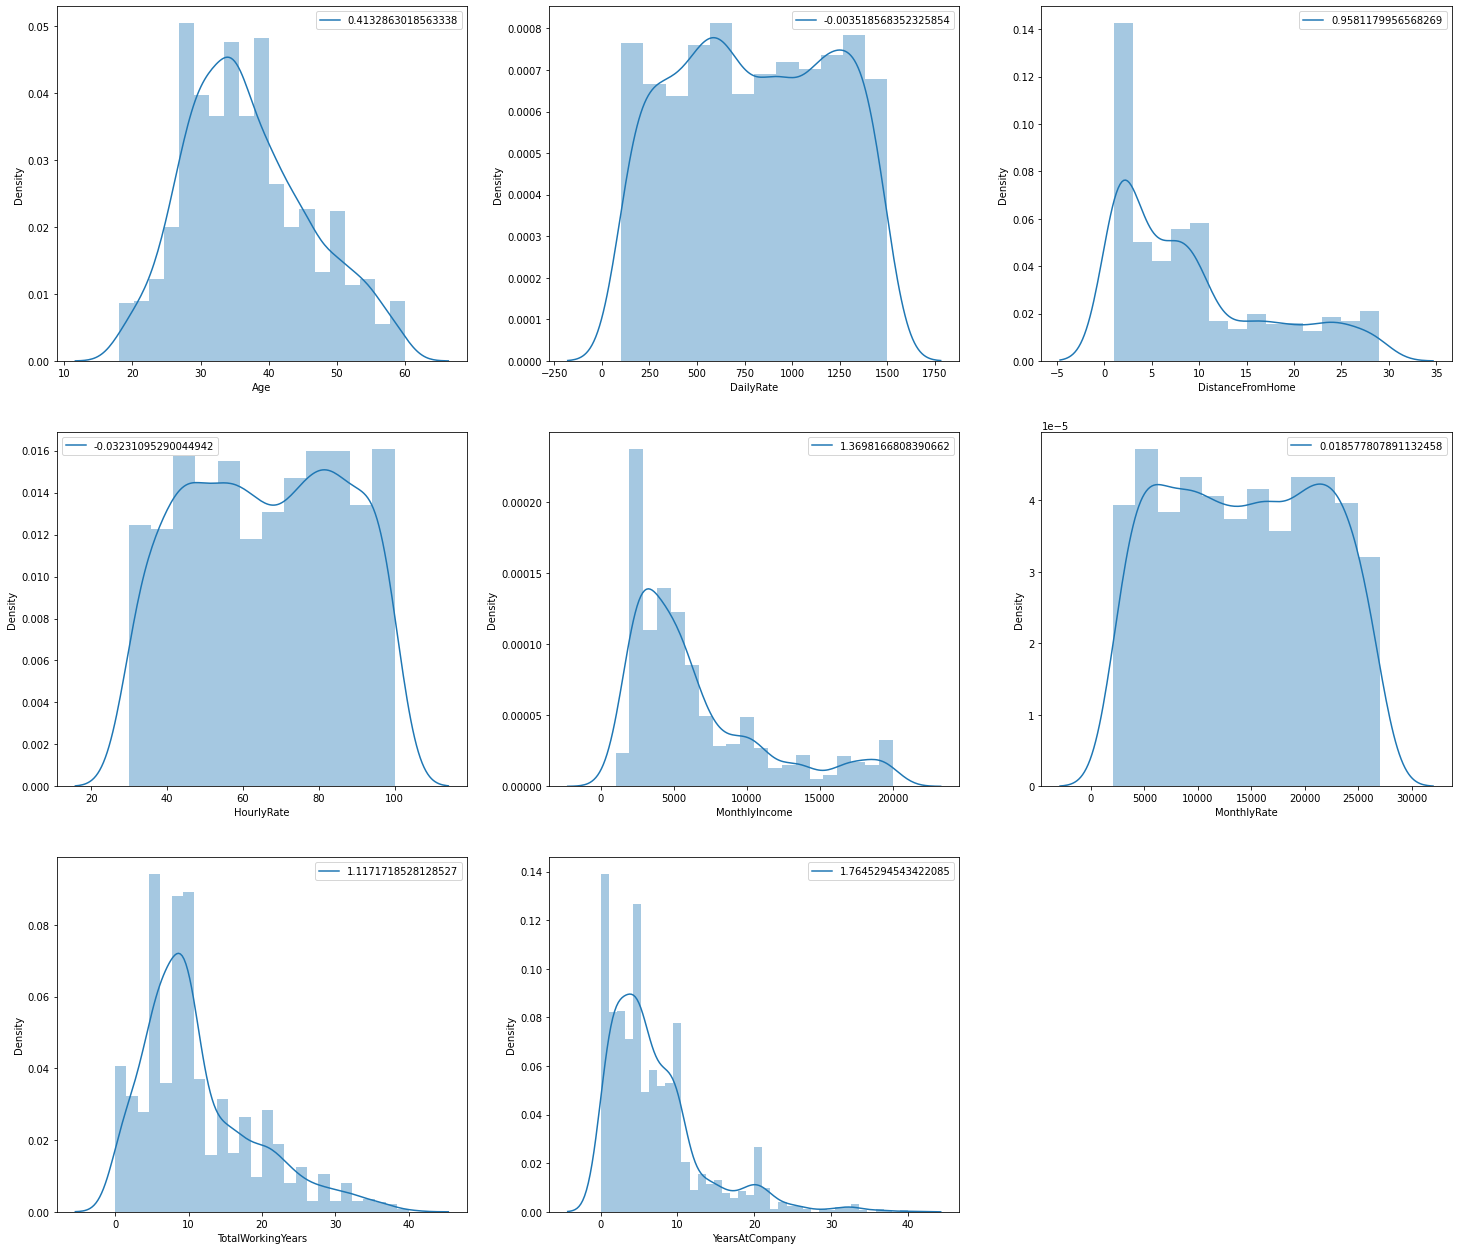

In [418]:
plt.figure(figsize= (25,30))
c =1
for i in continous_columns:
   
    plt.subplot(4,3,c)
    c = c +1
    sb.distplot(data[i])
    plt.legend([str(data[i].skew())])

### OBSERVATION:
    -  Skewness PResent.

#### Monthly INcome,  has high value of Outliers.

#### CHECKNIG FOR NULL VALUES/ Missing values

<AxesSubplot:>

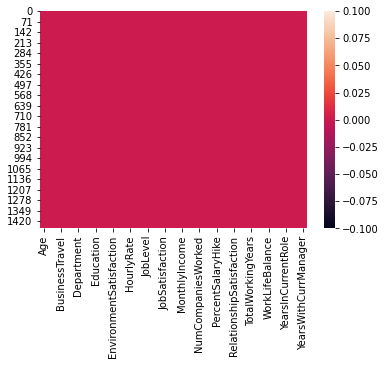

In [419]:
sb.heatmap(data.isnull())

#### OBSERVATIONS:
    - NO NULL VLAUES

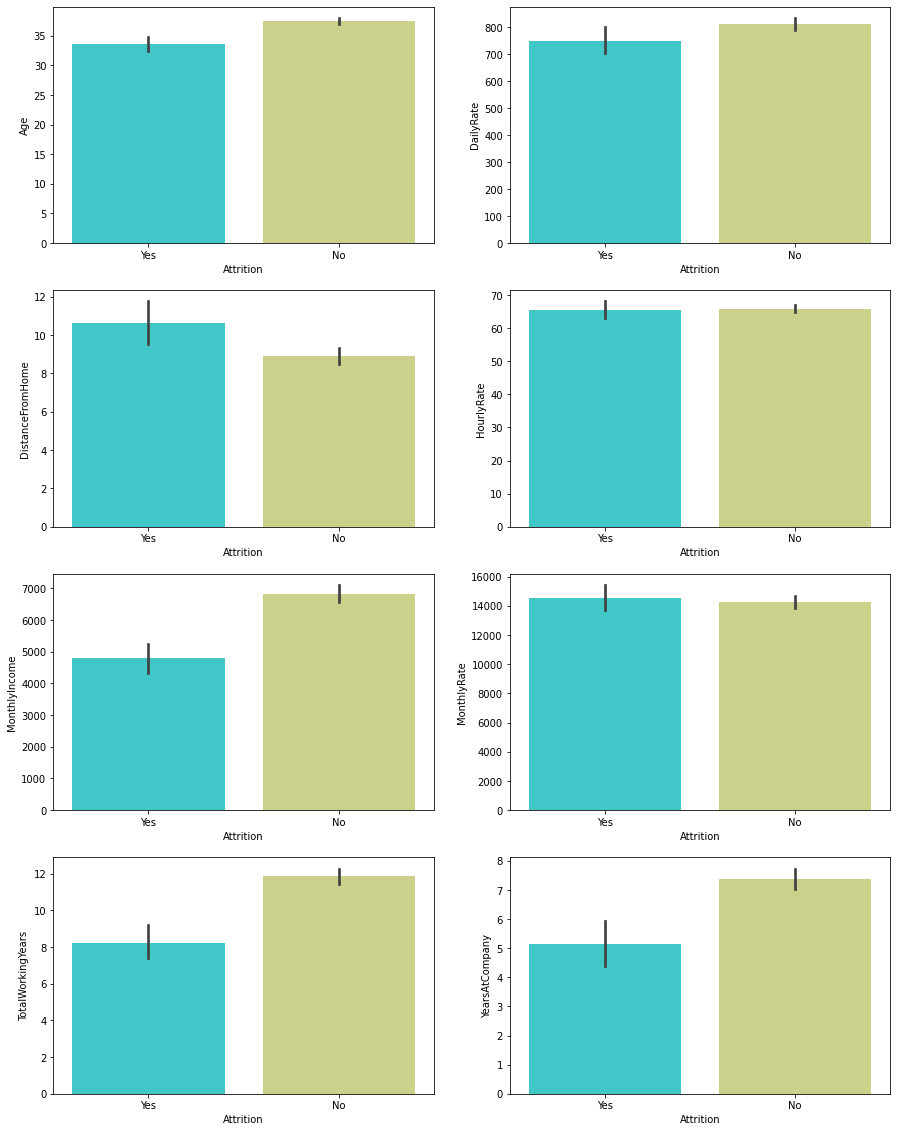

In [420]:
c = 1
plt.figure(figsize=(15,20))
for i in continous_columns:
    
    plt.subplot(4,2,c)
    c = c+1
    sb.barplot(data['Attrition'],data[i],palette='rainbow')

#### OBSERVATIONS:
    - From Attrion Yes, Distance from Home has Higher AverAGE value. Employee with far Distancefrom home are more likely in Attrtion Yes.
    - MonthlyRate, Hourly Rate has Same Average Values contibuting less to the Attrition.
    - High TotalWorkingYears, YearsAt Company,Monthly INcome,Age contribute to No Attrtition.

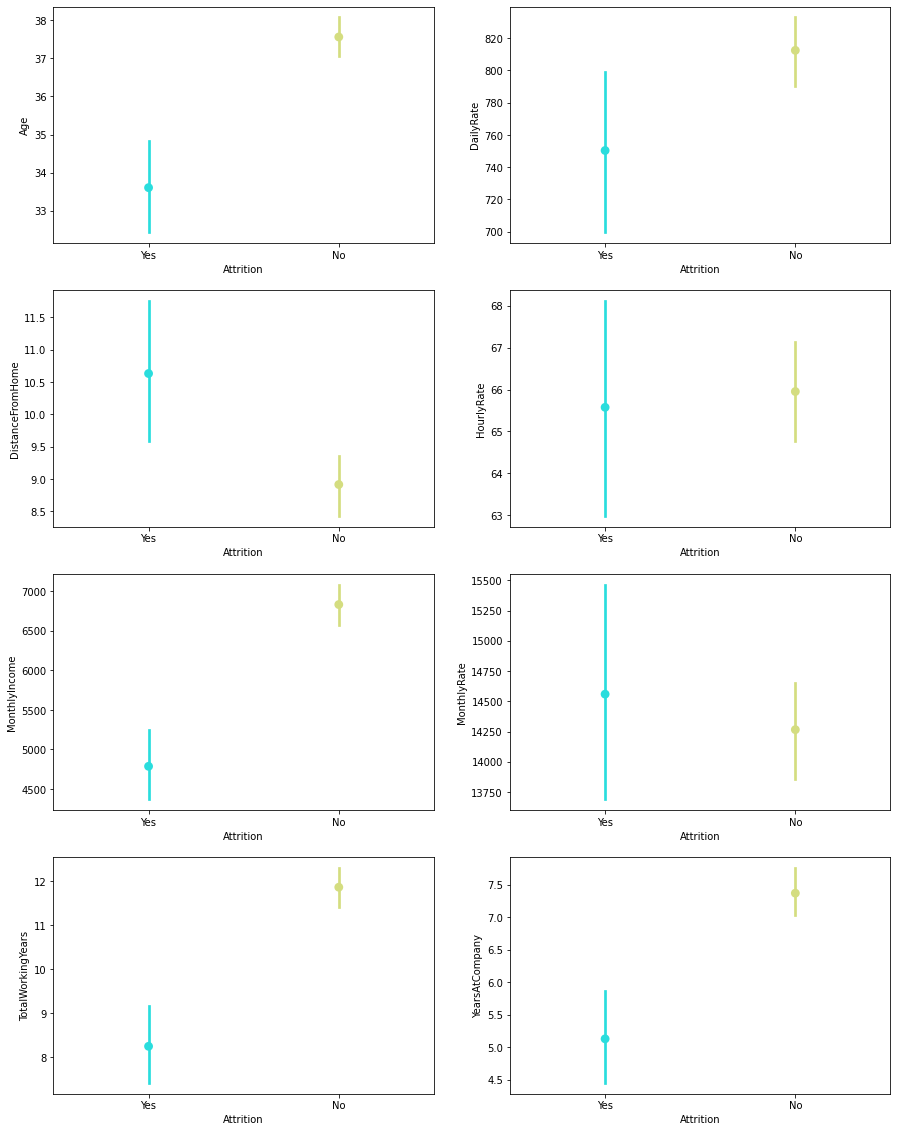

In [421]:
c = 1
plt.figure(figsize=(15,20))
for i in continous_columns:
    
    plt.subplot(4,2,c)
    c = c+1
    sb.pointplot(data['Attrition'],data[i],palette='rainbow')

#### OBSERVATION:
    - MEan Vlaue of Distance Distance for home for yes Attrition has major differnce with No Attrition.
    -  Total Working Year/ Monthly INcome/Age has High Diffence in Mean values with Attrtion.
    - MAny features like Monthly rate, Hourly Rate, Daily Rate, have less differences in mean values.
    
 ### REFER BELOW TO SEE EXACT VALUES IN DIFFERENCE
   

In [422]:
data.groupby('Attrition').mean()

Age   DailyRate  DistanceFromHome  Education  \
Attrition                                                       
No         37.561233  812.504461          8.915653   2.927007   
Yes        33.607595  750.362869         10.632911   2.839662   

           EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Attrition                                                                  
No                        2.771290   65.952149        2.770479  2.145985   
Yes                       2.464135   65.573840        2.518987  1.637131   

           JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
Attrition                                  ...                      
No                2.778589    6832.739659  ...           3.153285   
Yes               2.468354    4787.092827  ...           3.156118   

           RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
Attrition                                                                  
No                         2.733982          0.845093          11.862936   
Yes                        2.599156          0.527426           8.244726   

           TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
Attrition                                                           
No                      2.832928         2.781022        7.369019   
Yes                     2.624473         2.658228        5.130802   

           YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
Attrition                                                                     
No                   4.484185                 2.234388              4.367397  
Yes                  2.902954                 1.945148              2.852321  

[2 rows x 23 columns]

#### OBSERVATION:
    - Features contributing less/ having equal mean vlaue for both attritions are Hourly Rate/ Education/ EnvironmentSatisfaction/JobInvolvement/JobSatisfaction/ PerformanceRating/ RelationshipSatisfaction/ StockOptionLevel/
    TrainingTimesLastYear/ WorkLifeBalance/ YearsSinceLastPromotion

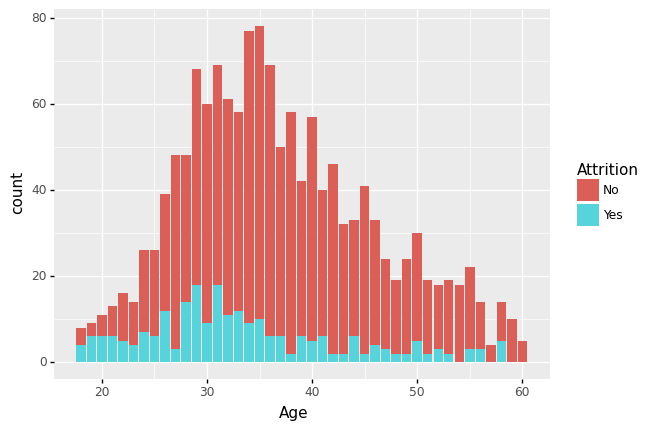

<ggplot: (76635670357)>

In [423]:
ggplot(data, aes(x='Age', fill = 'Attrition')) + geom_bar(stat = 'count')

#### OBSERVATIONS:
        -  Ages for Yes attrition is clearly less than No attrition.

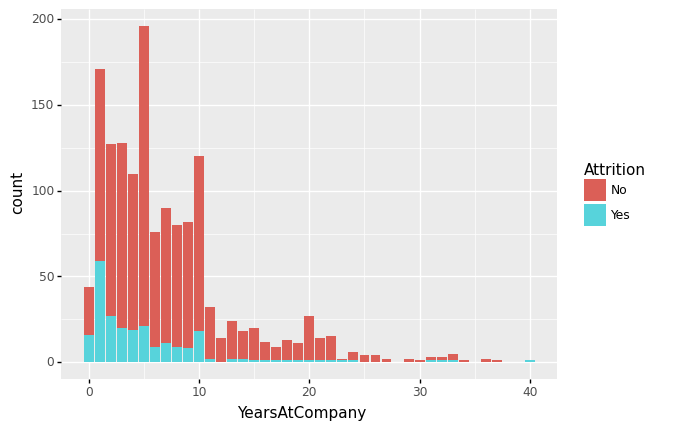

<ggplot: (76627814900)>

In [424]:
ggplot(data, aes(x='YearsAtCompany', fill = 'Attrition')) + geom_bar(stat = 'count')

#### OBSERVATIONS
    - Years At Company with 0-1-2 have higher rate of Yes Attrtion. , For Years at company with 0,1 have 50:50 probabilty  to belong to yes/No 

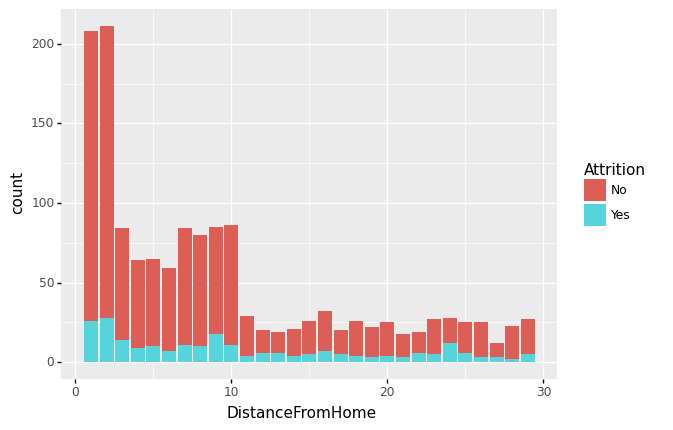

<ggplot: (76635280165)>

In [425]:
ggplot(data, aes(x='DistanceFromHome', fill = 'Attrition')) + geom_bar(stat = 'count')

#### OBservations:
    - DIstances from home probabiltiy to be in yes/ no descreases with increases in distance from home.
    - Lowest Distance from home have high probability to belong in No Attryion, more than 92%+ prob.

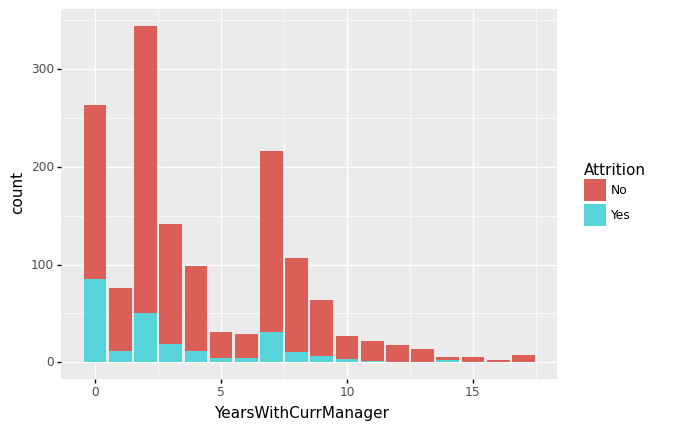

<ggplot: (76618544418)>

In [426]:
ggplot(data, aes(x='YearsWithCurrManager', fill = 'Attrition')) + geom_bar(stat = 'count')

#### OBSERVATIONS:
    - Yes Attriton High belong to lower values of YearsWith Currentmaanger.
    - Highest Yes Attrtion is with 0 years with curretnmanager.
    - Highest no  attrition is with 3 years with currmanager.
    - For higher Values of Years With Curretn manager, Probabilty of No attrtion is High.

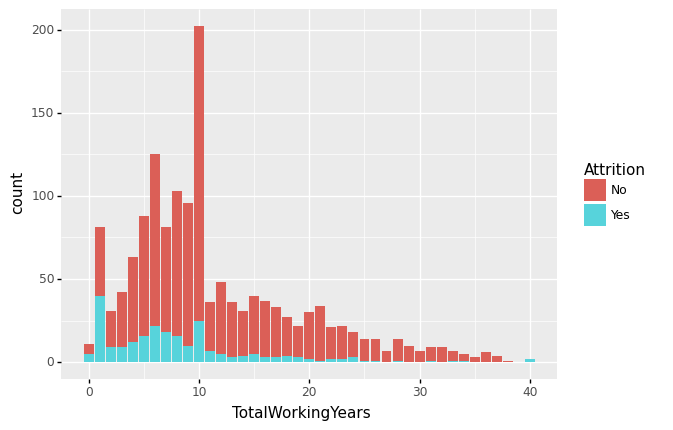

<ggplot: (76618489468)>

In [427]:
ggplot(data, aes(x='TotalWorkingYears', fill = 'Attrition')) + geom_bar(stat = 'count')

#### OBSERVATION:
    - Yes Attrition Highest in 1 total working Years.
     - Higher Vlaue of Total Working years have high probability to belong in No Attrtion.

#### LABELLING THE CATEGORICAL DATA

In [428]:
category = ['Attrition','OverTime', 'BusinessTravel','Department','Gender','JobRole','MaritalStatus','EducationField']

In [429]:
from sklearn.preprocessing import LabelEncoder

In [430]:
encoder = LabelEncoder()

In [431]:
for i in category:
    data[i] = encoder.fit_transform(data[i])

In [432]:
data[continous_columns].skew()

Age                  0.413286
DailyRate           -0.003519
DistanceFromHome     0.958118
HourlyRate          -0.032311
MonthlyIncome        1.369817
MonthlyRate          0.018578
TotalWorkingYears    1.117172
YearsAtCompany       1.764529
dtype: float64

### DATA CLEANING:
    - OUTLIER DETECTION? TREATMENT

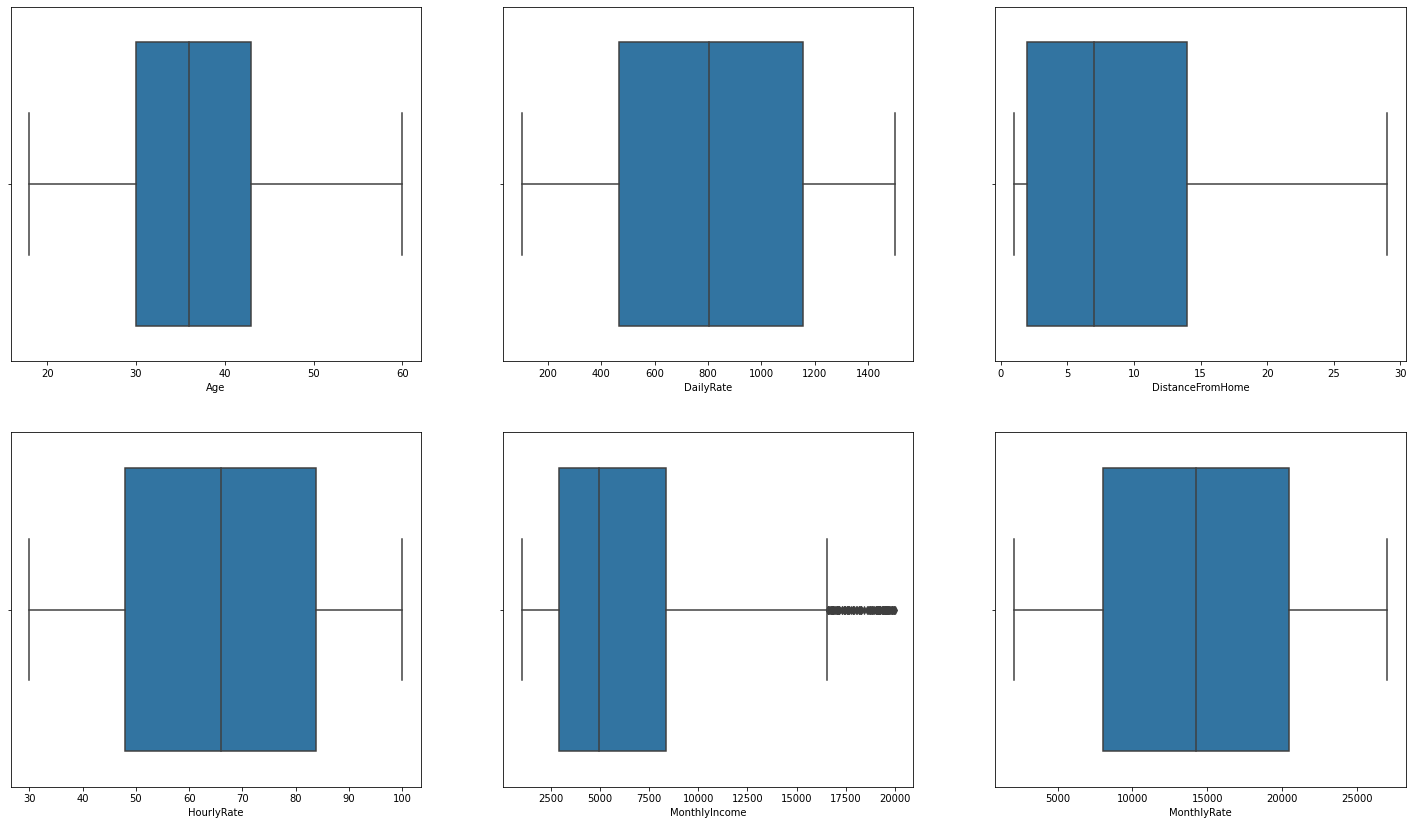

In [433]:
plt.figure(figsize= (25,30))
c =1
for i in continous_columns[:-2]:
   
    plt.subplot(4,3,c)
    c = c +1
    sb.boxplot(data[i])

#### OUTLIER TREATMENT WITH ZSCORE METHOD

In [434]:
from scipy.stats import  zscore

In [435]:
data1 = data

In [436]:
zscores = zscore(data1)

In [437]:
data1.shape

(1470, 31)

In [438]:
len(np.where(zscores > 3)[0])

110

In [439]:
data1 = data1[(zscores<3).all(axis=1)]

In [440]:
data1.shape

(1387, 31)

#### OBSERVATIONS:
    - (1470-1387)/1470 : 5.6 % DATA LOSS OBSERVED

In [441]:
data1['MonthlyIncome'] = np.log(data1['MonthlyIncome'])

In [442]:
data1[continous_columns].skew()

Age                  0.472280
DailyRate           -0.017078
DistanceFromHome     0.954752
HourlyRate          -0.030481
MonthlyIncome        0.318593
MonthlyRate          0.030596
TotalWorkingYears    1.034487
YearsAtCompany       1.248623
dtype: float64

In [443]:
x = data1.drop('Attrition',axis=1)

In [444]:
y = data1['Attrition']

In [445]:
x.iloc[:,:5].corrwith(y)

Age                -0.159366
BusinessTravel     -0.001041
DailyRate          -0.057220
Department          0.063637
DistanceFromHome    0.081788
dtype: float64

#### MULTIVARIANTE ANALYSIS

<AxesSubplot:>

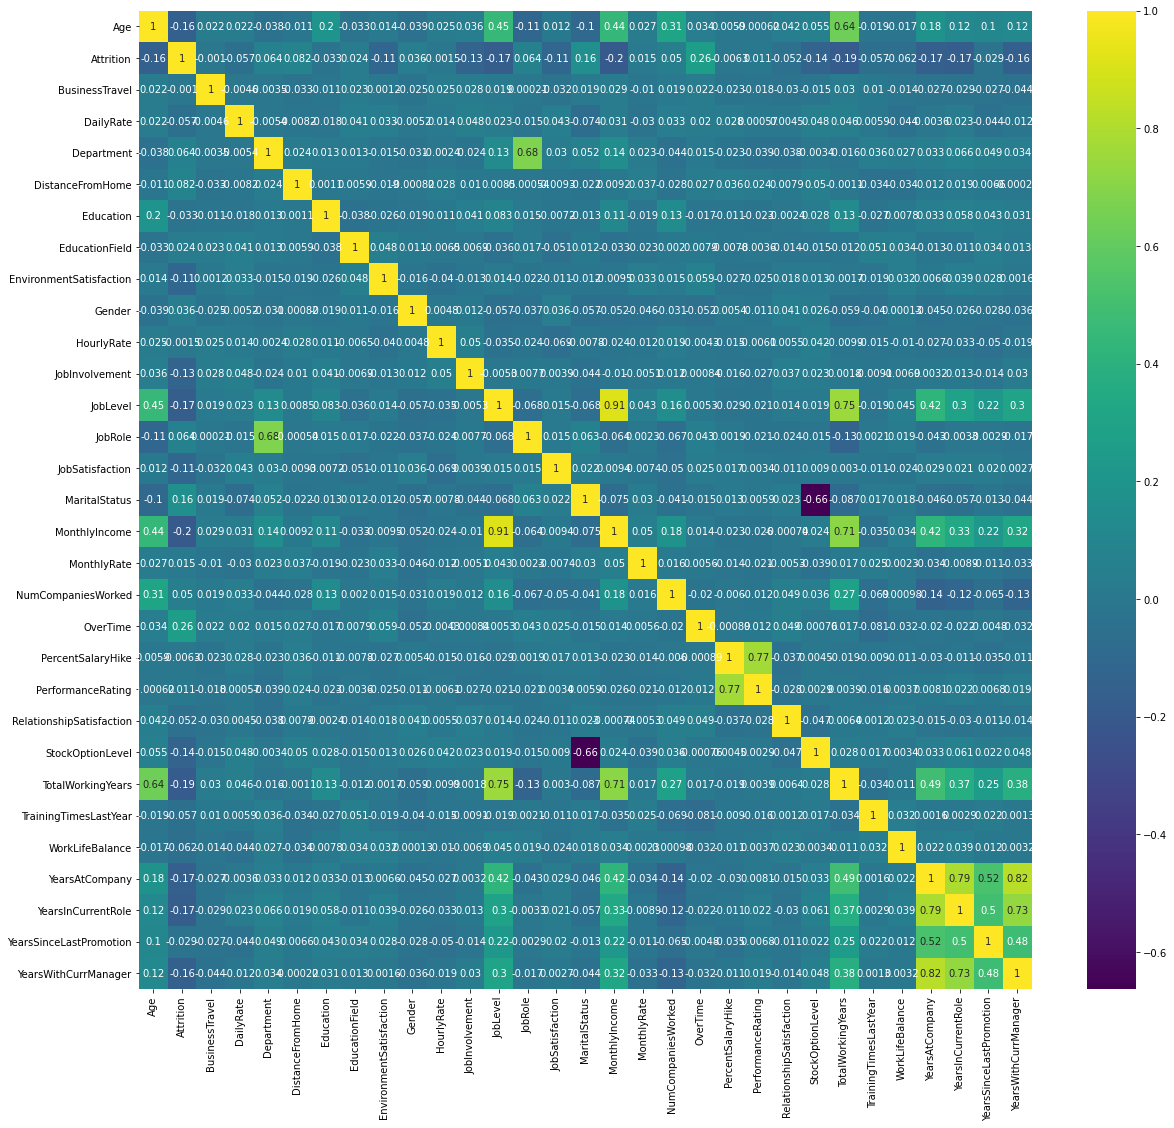

In [446]:
plt.figure(figsize=(20,18))
sb.heatmap(data1.corr(),annot=True,cmap='viridis')

In [515]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## VIF INFLUENCE FOR MULTICOLLINEARITY

In [448]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  

In [449]:
vif_data[vif_data['VIF']>10]

feature         VIF
0                 Age   32.738849
3          Department   13.753059
9          HourlyRate   11.713152
10     JobInvolvement   15.885914
11           JobLevel   17.260713
15      MonthlyIncome  236.943804
19  PercentSalaryHike   44.952316
20  PerformanceRating  173.528495
23  TotalWorkingYears   12.744776
25    WorkLifeBalance   16.407853
26     YearsAtCompany   13.173963

### FEATURE SELECTION

In [516]:
x1  = x.drop(['Age','JobLevel','PerformanceRating','MonthlyIncome','WorkLifeBalance'],axis=1)

In [451]:
vif_data = pd.DataFrame()
vif_data["feature"] = x1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x1.values, i)
                          for i in range(len(x1.columns))]
  

vif_data[vif_data['VIF']>10]

feature        VIF
2          Department  12.623988
8          HourlyRate  10.671321
9      JobInvolvement  14.363599
16  PercentSalaryHike  15.436537
21     YearsAtCompany  12.945176

#### OBSERVATIONS: 
    - high Correlation Between AGE and TOTALWORKINGYEARS/ MONTHLYINCOME AND JOBLEVEL , Total Working Years AND MonthlyINcome, Years at Company with Years With CurrManager.
    -  Moderate Correlation with Attrition and TotalWorkingYears,YearsWithCurrManager, YearsIncurrentRole,YearsAtCompany, StopOptionYears, OVERTime, MonthlyINcome, MaritalStatus, Joblevel, JobInvolvement, Age. with correlation 0.2 / -0.2

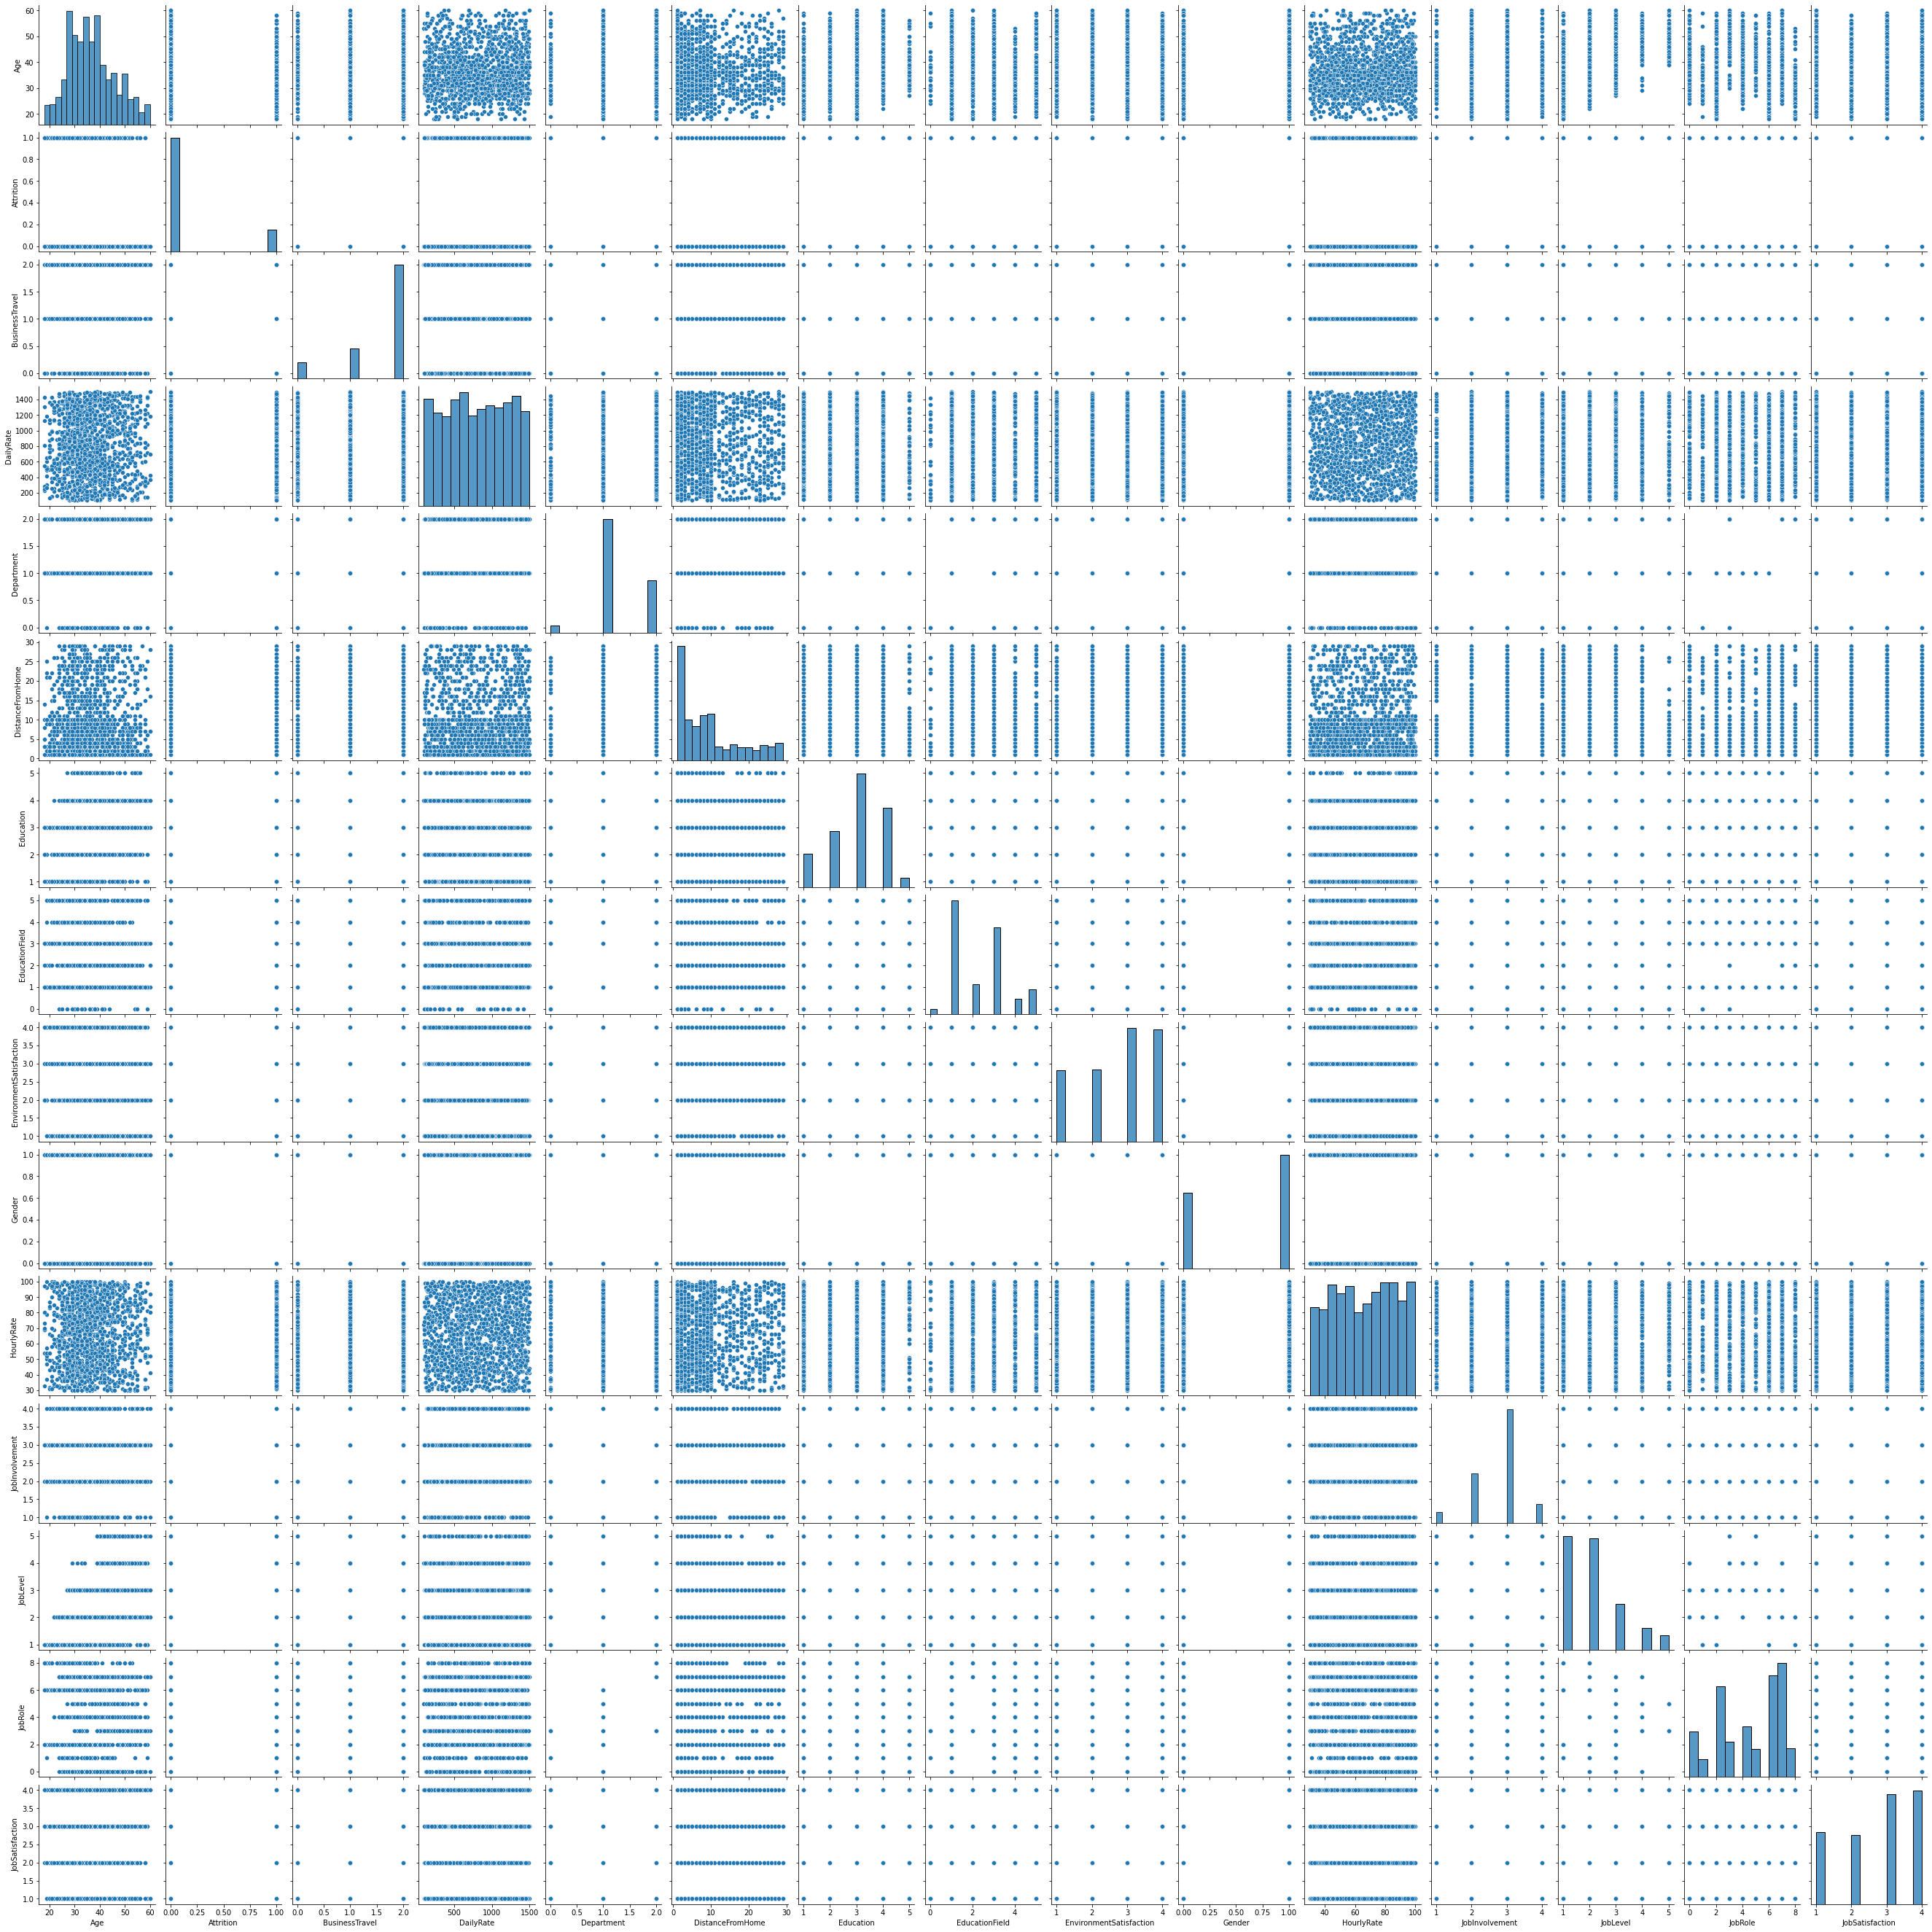

In [452]:
sb.pairplot(data.iloc[:,:15])

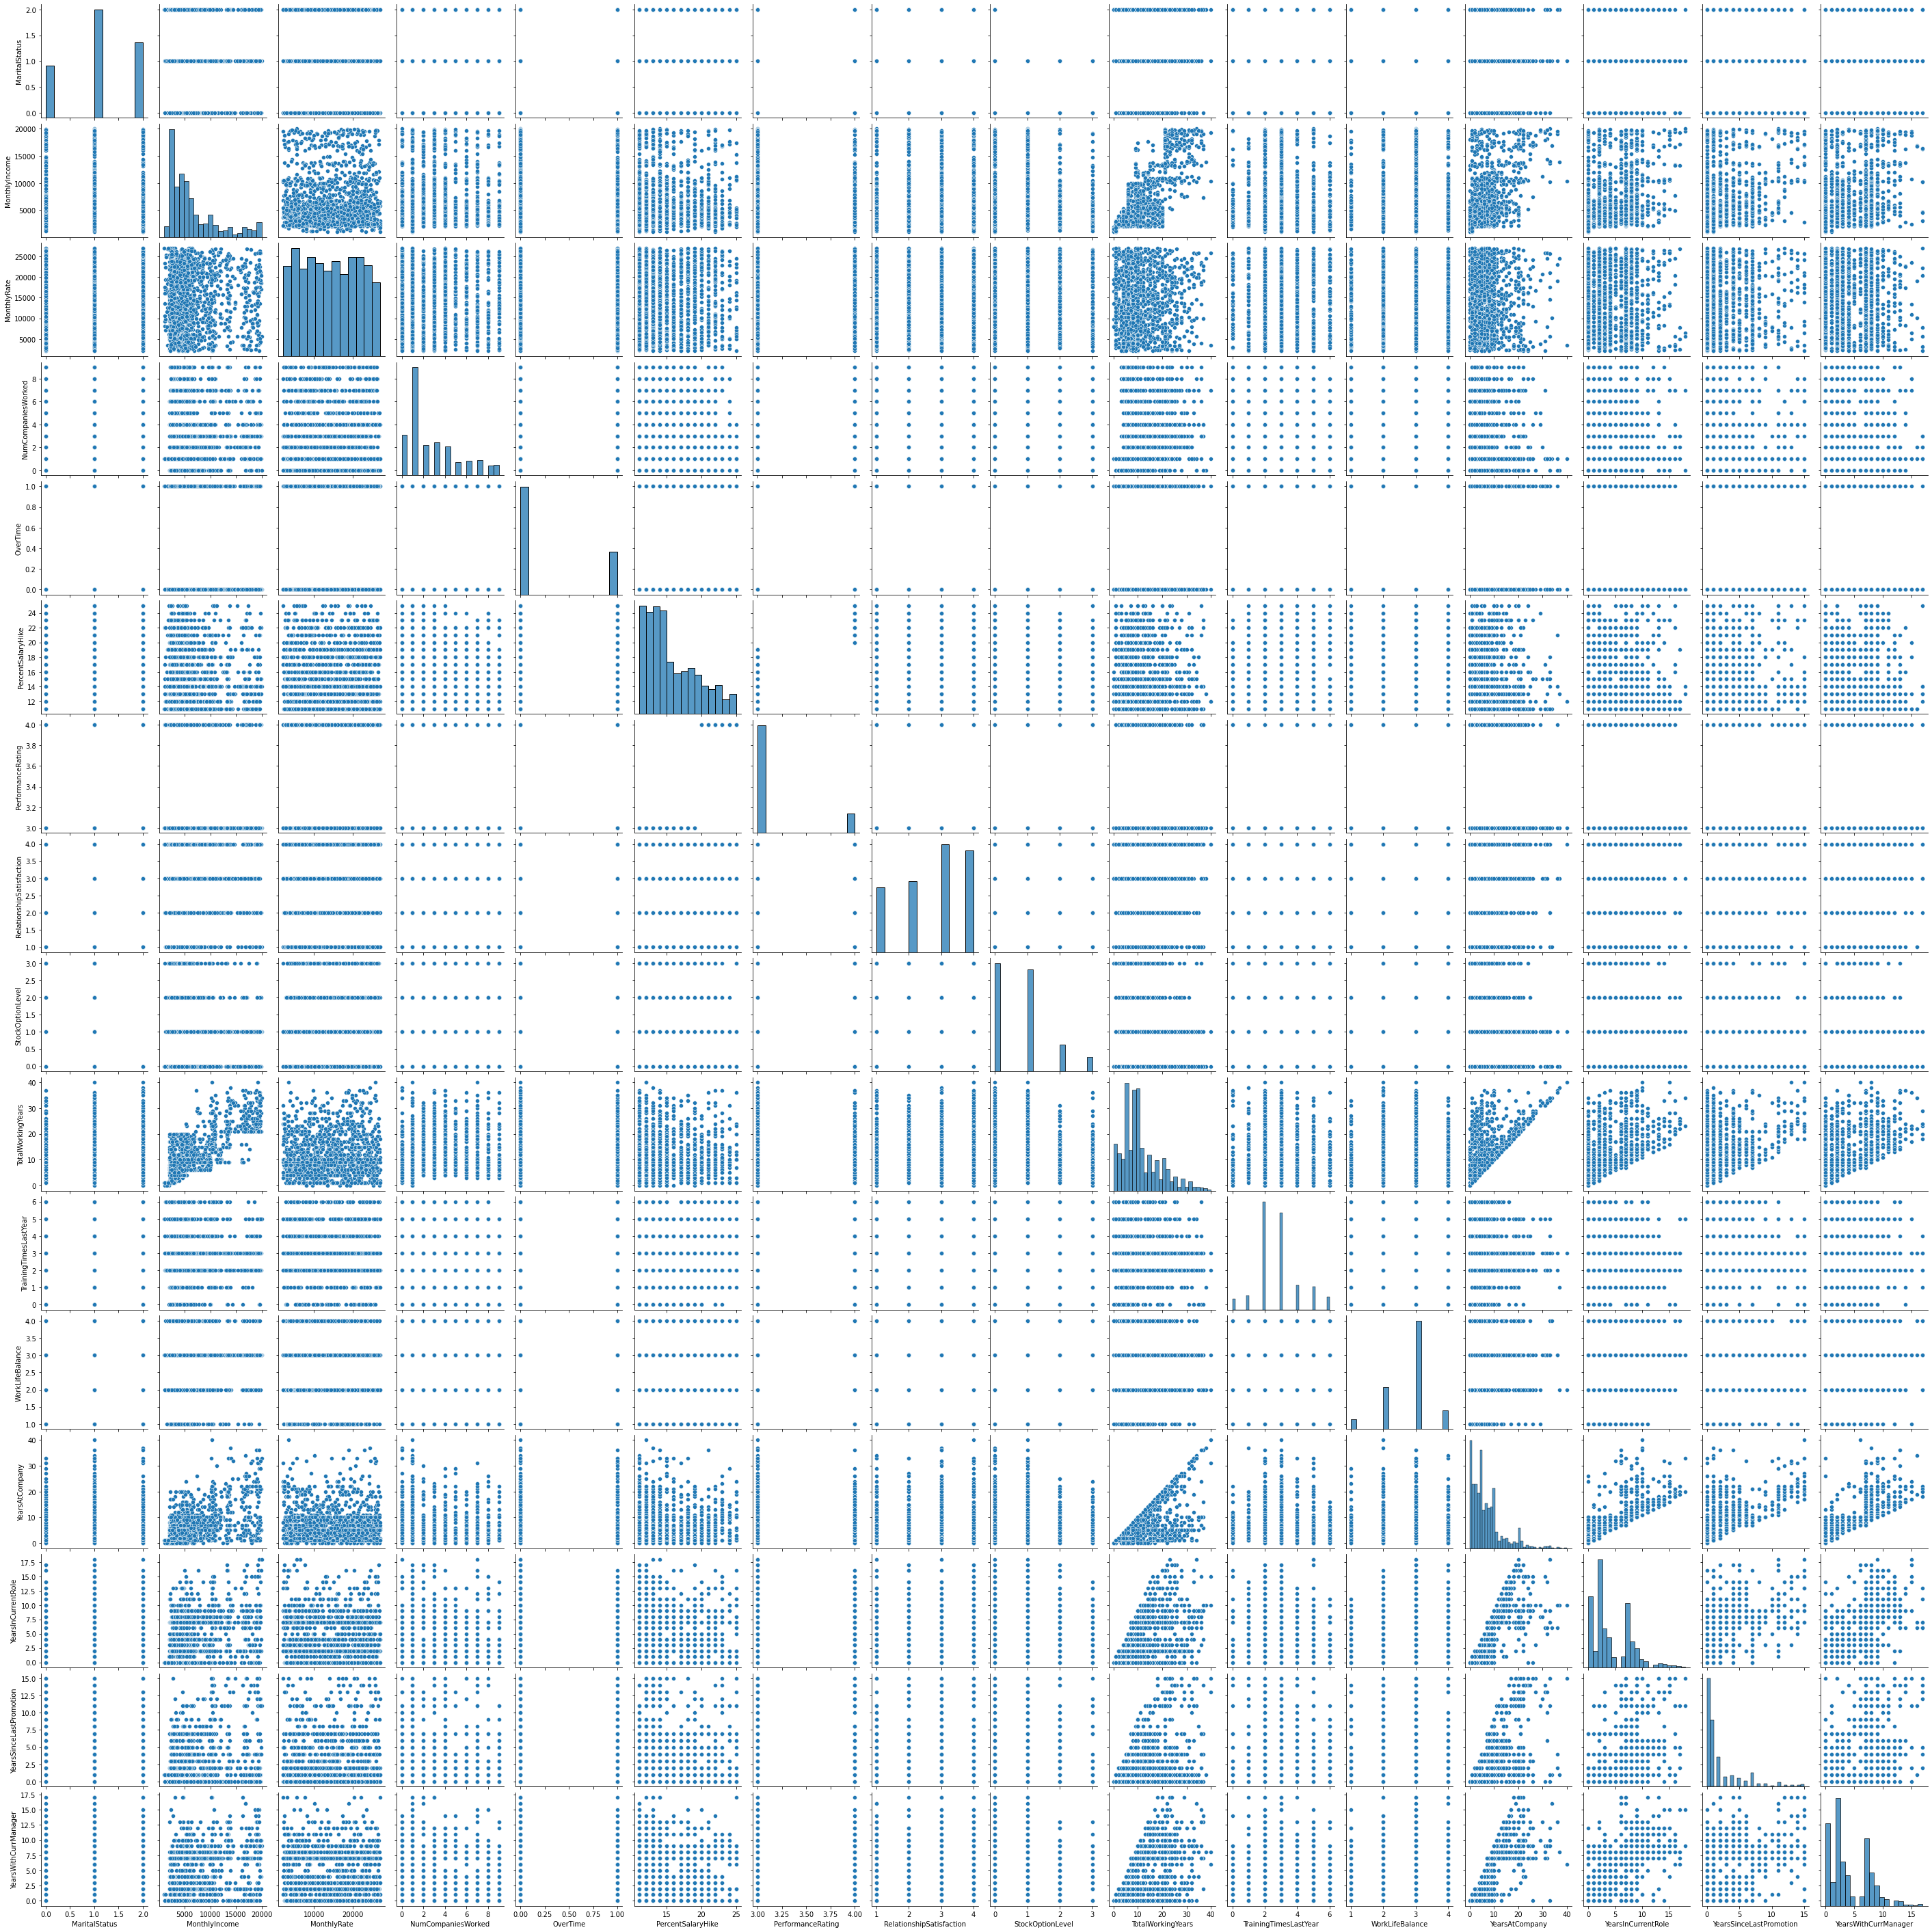

In [453]:
sb.pairplot(data.iloc[:,15:])

#### VISUALIZING HIGH CORRELATIONS BTW FEATURES

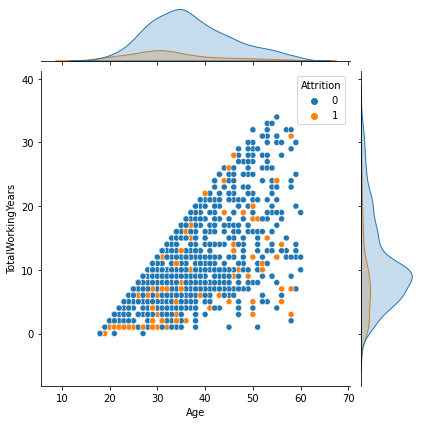

In [454]:
sb.jointplot(data1['Age'],data1['TotalWorkingYears'],hue=data1['Attrition'])


#### OBSERVATION:
    - Linear Relationship observed. mostly with Attrition No .

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

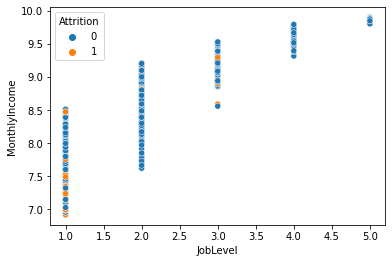

In [455]:
sb.scatterplot(data1['JobLevel'],data1['MonthlyIncome'],hue=data1['Attrition'])

#### OBSERVATIONS:
    - Attrition Yes, mostly on Job 1,3
    -

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

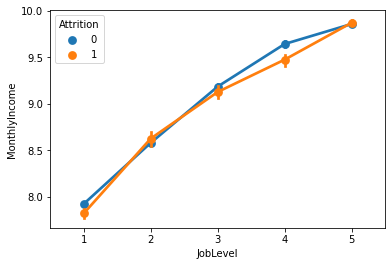

In [456]:
sb.pointplot(data1['JobLevel'],data1['MonthlyIncome'],hue=data1['Attrition'])

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

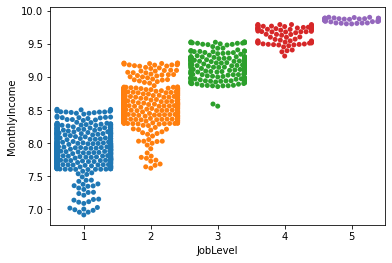

In [457]:
sb.swarmplot(data1['JobLevel'],data1['MonthlyIncome'])

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='YearsAtCompany'>

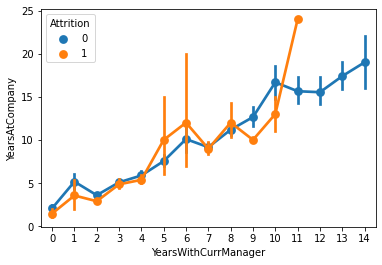

In [458]:
sb.pointplot(data1['YearsWithCurrManager'],data1['YearsAtCompany'],hue=data1['Attrition'])

#### OBSERVATIONS:
    - ATTRITION YES is in lower vlaues for Years witrh Company more . With higher Value of Years with Curretn Manager, Attrtion No observed.

In [459]:
from sklearn.preprocessing import MinMaxScaler

In [460]:
y = data1['Attrition']

In [461]:
data1.drop('Attrition',axis=1,inplace=True)

In [462]:
features = MinMaxScaler().fit_transform(data1)

In [463]:
features

array([[0.54761905, 1.        , 0.71633238, ..., 0.26666667, 0.        ,
        0.35714286],
       [0.73809524, 0.5       , 0.12679083, ..., 0.46666667, 0.09090909,
        0.5       ],
       [0.45238095, 1.        , 0.91045845, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21428571, 1.        , 0.03796562, ..., 0.13333333, 0.        ,
        0.21428571],
       [0.73809524, 0.5       , 0.65974212, ..., 0.4       , 0.        ,
        0.57142857],
       [0.38095238, 1.        , 0.37679083, ..., 0.2       , 0.09090909,
        0.14285714]])

In [464]:
scaled_data = pd.DataFrame(features, columns=data1.columns)

In [465]:
scaled_data

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     0.547619             1.0   0.716332         1.0          0.000000   
1     0.738095             0.5   0.126791         0.5          0.250000   
2     0.452381             1.0   0.910458         0.5          0.035714   
3     0.357143             0.5   0.924069         0.5          0.071429   
4     0.214286             1.0   0.350287         0.5          0.035714   
...        ...             ...        ...         ...               ...   
1382  0.428571             0.5   0.560172         0.5          0.785714   
1383  0.500000             1.0   0.366046         0.5          0.178571   
1384  0.214286             1.0   0.037966         0.5          0.107143   
1385  0.738095             0.5   0.659742         1.0          0.035714   
1386  0.380952             1.0   0.376791         0.5          0.250000   

      Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          0.25             0.2                 0.333333     0.0    0.914286   
1          0.00             0.2                 0.666667     1.0    0.442857   
2          0.25             0.8                 1.000000     1.0    0.885714   
3          0.75             0.2                 1.000000     0.0    0.371429   
4          0.00             0.6                 0.000000     1.0    0.142857   
...         ...             ...                      ...     ...         ...   
1382       0.25             0.6                 0.666667     1.0    0.157143   
1383       0.00             0.6                 1.000000     1.0    0.171429   
1384       0.50             0.2                 0.333333     1.0    0.814286   
1385       0.50             0.6                 1.000000     1.0    0.471429   
1386       0.50             0.6                 0.333333     1.0    0.742857   

      ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0     ...                0.0                  0.000000          0.000000   
1     ...                1.0                  1.000000          0.333333   
2     ...                0.0                  0.333333          0.000000   
3     ...                0.0                  0.666667          0.000000   
4     ...                0.0                  1.000000          0.333333   
...   ...                ...                       ...               ...   
1382  ...                0.0                  0.666667          0.333333   
1383  ...                0.0                  0.000000          0.333333   
1384  ...                1.0                  0.333333          0.333333   
1385  ...                0.0                  1.000000          0.000000   
1386  ...                0.0                  0.000000          0.000000   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0              0.235294               0.000000         0.000000   
1              0.294118               0.500000         0.666667   
2              0.205882               0.500000         0.666667   
3              0.235294               0.500000         0.666667   
4              0.176471               0.500000         0.666667   
...                 ...                    ...              ...   
1382           0.500000               0.500000         0.666667   
1383           0.264706               0.833333         0.666667   
1384           0.176471               0.000000         0.666667   
1385           0.500000               0.500000         0.333333   
1386           0.176471               0.500000         1.000000   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0               0.24            0.266667                 0.000000   
1               0.40            0.466667                 0.090909   
2               0.00            0.000000                 0.000000   
3               0.32            0.466667                 0.272727   
4               0.08            0.133333                 0.181818   
...              

#### SCALING CUSTOM SELECTED FEATORS VIA VIF FACTOR INFLUECNE

In [466]:
features = MinMaxScaler().fit_transform(x1)

features

x1_data = pd.DataFrame(features, columns=x1.columns)

x1_data

BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0                1.0   0.716332         1.0          0.000000       0.25   
1                0.5   0.126791         0.5          0.250000       0.00   
2                1.0   0.910458         0.5          0.035714       0.25   
3                0.5   0.924069         0.5          0.071429       0.75   
4                1.0   0.350287         0.5          0.035714       0.00   
...              ...        ...         ...               ...        ...   
1382             0.5   0.560172         0.5          0.785714       0.25   
1383             1.0   0.366046         0.5          0.178571       0.00   
1384             1.0   0.037966         0.5          0.107143       0.50   
1385             0.5   0.659742         1.0          0.035714       0.50   
1386             1.0   0.376791         0.5          0.250000       0.50   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0                0.2                 0.333333     0.0    0.914286   
1                0.2                 0.666667     1.0    0.442857   
2                0.8                 1.000000     1.0    0.885714   
3                0.2                 1.000000     0.0    0.371429   
4                0.6                 0.000000     1.0    0.142857   
...              ...                      ...     ...         ...   
1382             0.6                 0.666667     1.0    0.157143   
1383             0.6                 1.000000     1.0    0.171429   
1384             0.2                 0.333333     1.0    0.814286   
1385             0.6                 1.000000     1.0    0.471429   
1386             0.6                 0.333333     1.0    0.742857   

      JobInvolvement  ...  OverTime  PercentSalaryHike  \
0           0.666667  ...       1.0           0.000000   
1           0.333333  ...       0.0           0.857143   
2           0.333333  ...       1.0           0.285714   
3           0.666667  ...       1.0           0.000000   
4           0.666667  ...       0.0           0.071429   
...              ...  ...       ...                ...   
1382        1.000000  ...       0.0           0.428571   
1383        0.333333  ...       0.0           0.285714   
1384        1.000000  ...       1.0           0.642857   
1385        0.333333  ...       0.0           0.214286   
1386        1.000000  ...       0.0           0.071429   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                     0.000000          0.000000           0.235294   
1                     1.000000          0.333333           0.294118   
2                     0.333333          0.000000           0.205882   
3                     0.666667          0.000000           0.235294   
4                     1.000000          0.333333           0.176471   
...                        ...               ...                ...   
1382                  0.666667          0.333333           0.500000   
1383                  0.000000          0.333333           0.264706   
1384                  0.333333          0.333333           0.176471   
1385                  1.000000          0.000000           0.500000   
1386                  0.000000          0.000000           0.176471   

      TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                  0.000000            0.24            0.266667   
1                  0.500000            0.40            0.466667   
2                  0.500000            0.00            0.000000   
3                  0.500000            0.32            0.466667   
4                  0.500000            0.08            0.133333   
...                     ...             ...                 ...   
1382               0.500000            0.20            0.133333   
1383               0.833333            0.28            0.466667   
1384               0.000000            0.24            0.133333   
1385               0.500000            0.36 

###  DATA MODELLING
    - PCA MODELLING

In [467]:
from sklearn.decomposition import PCA

In [468]:
pca = PCA()

In [469]:
pca.fit(x1_data,y)

PCA()

<BarContainer object of 25 artists>

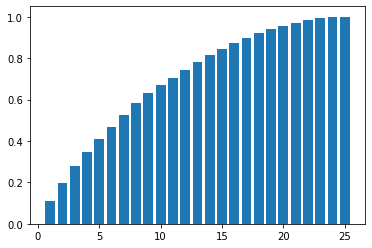

In [471]:
plt.bar(range(1,26),np.cumsum(pca.explained_variance_ratio_))

#### OBSERVATION:
    - No need for feature rediction as custom selection features, all the needed for modeling and noise component is less.
    
    
    


In [472]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score,roc_curve

#### DATA MODELING WITH custom selected Features

### SMOTHE ANALYSIS FOR IMBALANCED CLASSES

In [473]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()


In [474]:
x_over1, y_over1 = smote.fit_resample(x1_data,y)

In [475]:
randomstate = 0
max_score = 0
lr = LogisticRegression()
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_over1,y_over1,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    score = accuracy_score(y_test,pred)    
    if(score>max_score):
        max_score = score
        randomstate  = i
print( 'Random State=',randomstate,' and R2 Score of MODEL : ',max_score)

Random State= 168  and R2 Score of MODEL :  0.8043165467625899


#### OBSERVATION:
    - DATA MODELLING WITH AND WITHOUT DIMENSION REDUCTION IS VERY LESS AROUND LOSS OF .002 %.
    - WE can Proceed iwth 25 Components as accuracy score does not differ much, better to use to less data / feature for better performance/ and less noise and other features are not significantly effecting out model performance we can remvoe it.

In [477]:
x_train,x_test,y_train,y_test = train_test_split(x_over1, y_over1 ,test_size=.30,random_state=168)
   

In [478]:
roc_scores = []
cv_scores = []
acc_scores = []

In [481]:
def model_predict(model):
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,pred_proba)
    acc_score = accuracy_score(y_test,predictions)
    print('------------',model,'--------------')
    print(' Accuracy Score         : ', acc_score)
    print('ROC AUC Score           : ', roc_auc_score(y_test,pred_proba))
    print('Cross Validation Score  : ',np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring='roc_auc')))
    print(classification_report(y_test,predictions))
    acc_scores.append(acc_score)
    cv_scores.append(np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring='roc_auc')))
    roc_scores.append(roc_auc_score(y_test,pred_proba))
    plt.figure(figsize=(8,5))
    plt.plot(fpr,tpr)
    plt.ylabel('Sensitivity')
    plt.xlabel('1 - Specificity')
    leg = 'ROC CURVE SCORE:'+ str(roc_auc_score(y_test,pred_proba))
    plt.legend( [leg],loc= 10)
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)
    
    

### LOGISTIC REGRESSION

------------ LogisticRegression() --------------
 Accuracy Score         :  0.8043165467625899
ROC AUC Score           :  0.8623202809249321
Cross Validation Score  :  0.8487864495991218
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       351
           1       0.79      0.82      0.81       344

    accuracy                           0.80       695
   macro avg       0.80      0.80      0.80       695
weighted avg       0.80      0.80      0.80       695



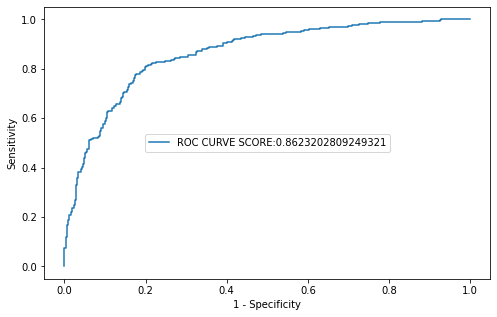

<Figure size 432x288 with 0 Axes>

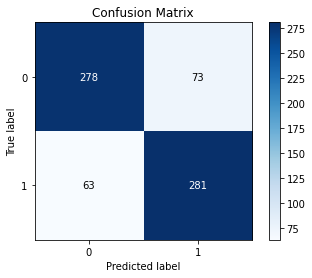

In [482]:
model_predict(LogisticRegression())

### SVC

------------ SVC(probability=True) --------------
 Accuracy Score         :  0.8661870503597122
ROC AUC Score           :  0.9383489034651825
Cross Validation Score  :  0.9326907776215521
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       351
           1       0.83      0.92      0.87       344

    accuracy                           0.87       695
   macro avg       0.87      0.87      0.87       695
weighted avg       0.87      0.87      0.87       695



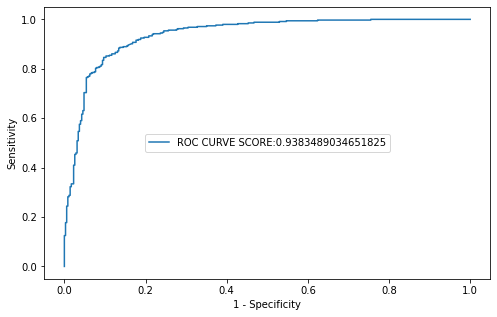

<Figure size 432x288 with 0 Axes>

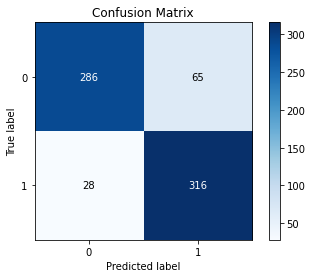

In [483]:
model_predict(SVC(probability=True))

### KNN MODEL

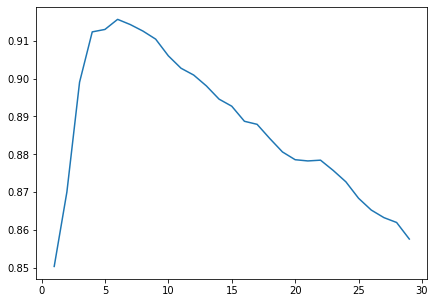

In [484]:
knn_acc =[]
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_proba_knn = knn.predict_proba(x_test)[:,1]
    knn_acc.append(roc_auc_score(y_test,pred_proba_knn))

plt.figure(figsize=(7,5))
plt.plot(range(1,30),knn_acc)

------------ KNeighborsClassifier() --------------
 Accuracy Score         :  0.8086330935251799
ROC AUC Score           :  0.912952196382429
Cross Validation Score  :  0.8979233694142856
              precision    recall  f1-score   support

           0       0.99      0.63      0.77       351
           1       0.72      0.99      0.84       344

    accuracy                           0.81       695
   macro avg       0.86      0.81      0.80       695
weighted avg       0.86      0.81      0.80       695



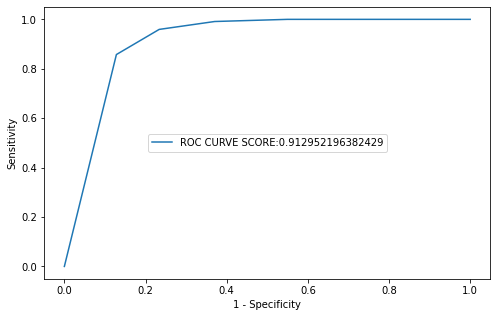

<Figure size 432x288 with 0 Axes>

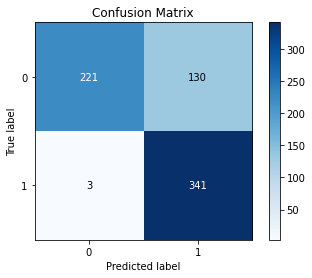

In [485]:
model_predict(KNeighborsClassifier(n_neighbors=5))

### DECISION TREE CLASSIFIER

------------ DecisionTreeClassifier(splitter='random') --------------
 Accuracy Score         :  0.8316546762589928
ROC AUC Score           :  0.8322608162724442
Cross Validation Score  :  0.8203277487753347
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       351
           1       0.79      0.89      0.84       344

    accuracy                           0.83       695
   macro avg       0.84      0.83      0.83       695
weighted avg       0.84      0.83      0.83       695



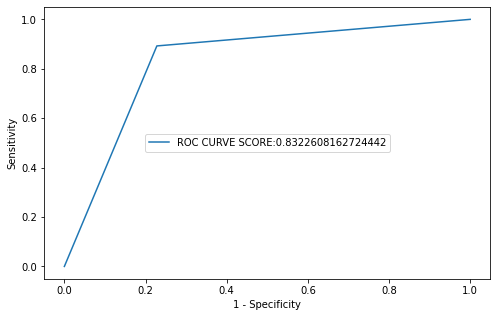

<Figure size 432x288 with 0 Axes>

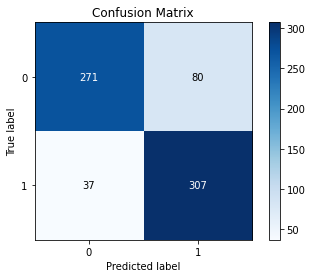

In [486]:
model_predict(DecisionTreeClassifier(splitter='random'))

### ENSEBLING TECHNIQUE: RANDOM FOREST

------------ RandomForestClassifier() --------------
 Accuracy Score         :  0.9266187050359712
ROC AUC Score           :  0.9802391837275557
Cross Validation Score  :  0.9696664545692599
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       351
           1       0.94      0.91      0.92       344

    accuracy                           0.93       695
   macro avg       0.93      0.93      0.93       695
weighted avg       0.93      0.93      0.93       695



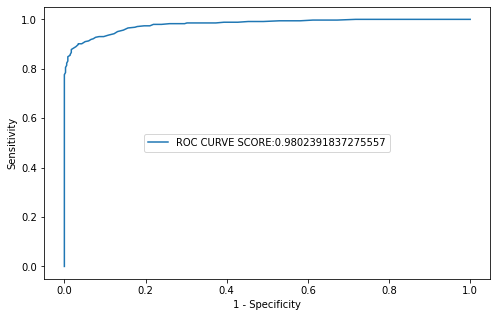

<Figure size 432x288 with 0 Axes>

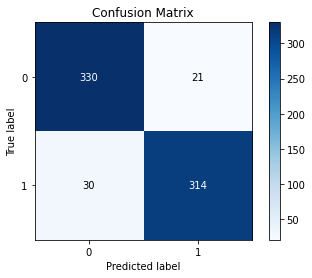

In [487]:
model_predict(RandomForestClassifier())

### ENSEBLING TECHNIQUE: ADA BOOST

------------ AdaBoostClassifier() --------------
 Accuracy Score         :  0.8992805755395683
ROC AUC Score           :  0.9630043728880938
Cross Validation Score  :  0.9524385332927968
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       351
           1       0.89      0.90      0.90       344

    accuracy                           0.90       695
   macro avg       0.90      0.90      0.90       695
weighted avg       0.90      0.90      0.90       695



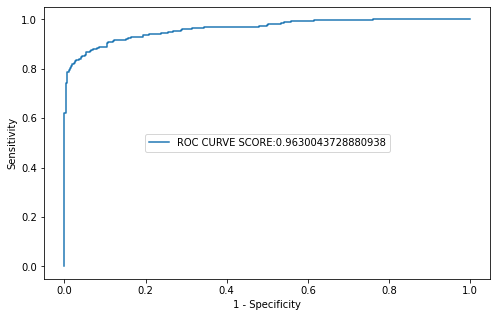

<Figure size 432x288 with 0 Axes>

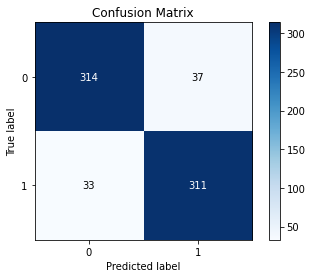

In [488]:
model_predict(AdaBoostClassifier())

### ENSEBLING TECHNIQUE: GRADIENT BOOSTING

------------ GradientBoostingClassifier() --------------
 Accuracy Score         :  0.9223021582733812
ROC AUC Score           :  0.9716921751805472
Cross Validation Score  :  0.9651455753164082
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       351
           1       0.95      0.89      0.92       344

    accuracy                           0.92       695
   macro avg       0.92      0.92      0.92       695
weighted avg       0.92      0.92      0.92       695



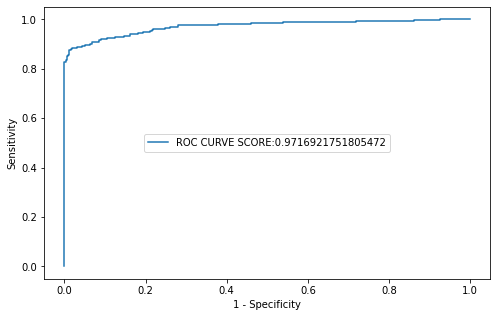

<Figure size 432x288 with 0 Axes>

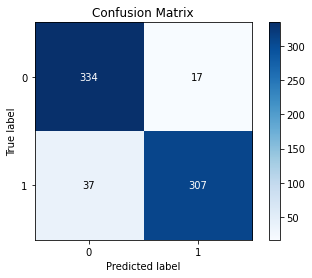

In [489]:
model_predict(GradientBoostingClassifier())

### BOOSTING MODEL: XGB CLASSIFER

[14:15:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:15:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------------ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
         

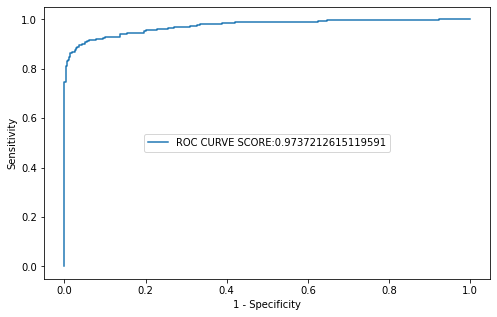

<Figure size 432x288 with 0 Axes>

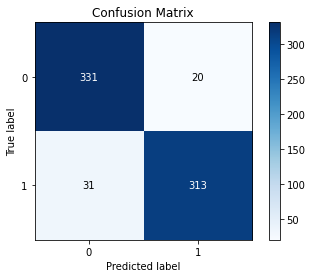

In [490]:
model_predict(XGBClassifier(verbose=0))

### BOOSTING MODEL: LIGHTGBM CLASSIFIER

------------ LGBMClassifier() --------------
 Accuracy Score         :  0.9309352517985612
ROC AUC Score           :  0.9749469952958324
Cross Validation Score  :  0.966985363943126
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       351
           1       0.95      0.90      0.93       344

    accuracy                           0.93       695
   macro avg       0.93      0.93      0.93       695
weighted avg       0.93      0.93      0.93       695



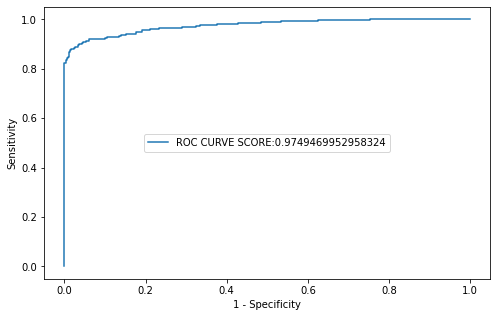

<Figure size 432x288 with 0 Axes>

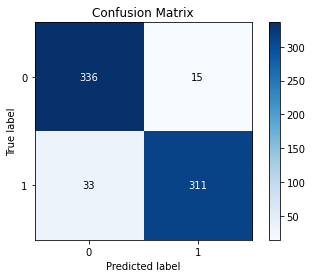

In [491]:
model_predict(LGBMClassifier())

In [492]:
error = []
for i in range(0,9):
    error.append(np.abs(roc_scores[i] - cv_scores[i]))
    

In [493]:
table_dict = {
    'ROC AUC SCORE: ':roc_scores,
    'ACCURACY SCORE': acc_scores,
    'CV SCORE': cv_scores,
    'Bias/ Error': error
}

In [494]:
table_model = pd.DataFrame(table_dict,index=['LReg','SVC','KNN','DTC','RF','AdaB','GB','XGBC','LightGBMC'])

In [495]:
table_model

ROC AUC SCORE:   ACCURACY SCORE  CV SCORE  Bias/ Error
LReg              0.862320        0.804317  0.848786     0.013534
SVC               0.938349        0.866187  0.932691     0.005658
KNN               0.912952        0.808633  0.897923     0.015029
DTC               0.832261        0.831655  0.809871     0.022389
RF                0.980239        0.926619  0.968361     0.011878
AdaB              0.963004        0.899281  0.952439     0.010566
GB                0.971692        0.922302  0.965306     0.006387
XGBC              0.973721        0.926619  0.968367     0.005355
LightGBMC         0.974947        0.930935  0.966985     0.007962

#### OBSERVATIONS:
    - CHosen metric for evaluation: Roc AUC Score.
    - As CV scores and Evaluation Scores are near to each other, Underfitting is ruled out.
    
    - Model with Least Error / Biassness is XGBC/ GB/ RF/ SVC , So we choose with Highest ROC : XGBC
    - MODEL TO HYPERTUNE : XGBoost Classfier

#### HYPERTUNING MODEL  XGBoost Classfier

In [496]:
params = {
    'n_estimators': [50,100,150,200],
    'max_depth': [5,10,15,20,25],
    'learning_rate': [0.1,.5,.2,0.01],
    'gamma': [.1,.5,1,2,5],
    'subsample': [1,.8,.75,.6],
    'colsample_bytree':[1,.8,.75,.6],
    'min_child_weight': [1,3,5,2]
    
    
}

In [497]:
boost = XGBClassifier()
grid = RandomizedSearchCV(boost,params,cv=5,n_iter=70,scoring='roc_auc',verbose=2)

In [498]:
grid.fit(x_over1,y_over1)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[14:16:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.75, gamma=2, learning_rate=0.5, max_depth=15, min_child_weight=3, n_estimators=200, subsample=0.6; total time=   0.2s
[14:16:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.75, gamma=2, learning_rate=0.5, max_depth=15, min_child_weight=3, n_estimators=200, subsample=0.6; total time=   0.3s
[14:16:12] WARNING: C:/Use

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [499]:
grid.best_estimator_,grid.best_score_

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.75, gamma=0.1, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.5, max_delta_step=0, max_depth=25,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
               tree_method='exact', validate_parameters=1, verbosity=None),
 0.9810532548604783)

[14:22:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------------ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None) --------------
 Accuracy Score         :  0.939568345323741
ROC AUC Score           :  0.9776

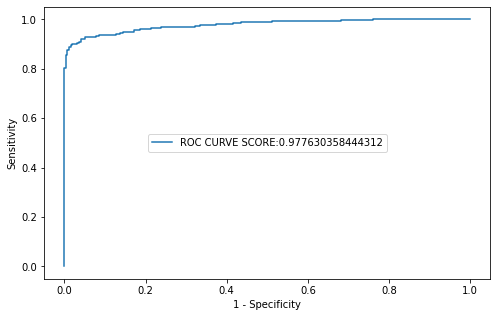

<Figure size 432x288 with 0 Axes>

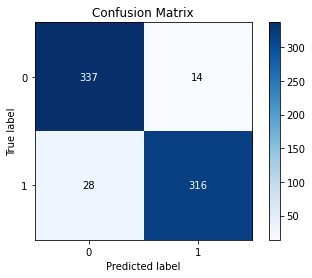

In [509]:
model_predict(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.75, gamma=0.01, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.05, max_delta_step=0, max_depth=25,
               min_child_weight=1,monotone_constraints='()',
               n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
               tree_method='exact', validate_parameters=1, verbosity=None))

#### observations:
        - AFTER HYPERTUNING WE GET ROC AUC SCORE OF .97 and CV score of 0.98.
        - Error term is negligent.
### EVALUATING THE TUNED XGBOOST CLASSIFIER

[14:23:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

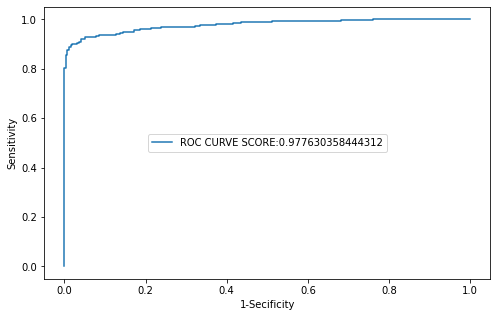

<Figure size 432x288 with 0 Axes>

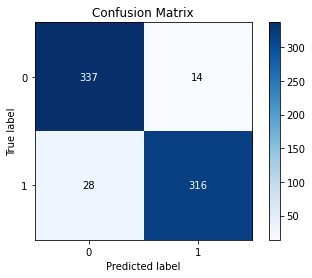

In [511]:
    model =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.75, gamma=0.01, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.05, max_delta_step=0, max_depth=25,
               min_child_weight=1,monotone_constraints='()',
               n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
               tree_method='exact', validate_parameters=1, verbosity=None)
    model.fit(x_train,y_train)
    cv_score = np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring='roc_auc'))
    predictions = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,pred_proba)
    acc_score = accuracy_score(y_test,predictions)
    print('-------------XGBOOST CLASSIFIER MODEL--------------')
    print(' ------------Accuracy Score------------------- ', acc_score)
    print('-------------AUC ROC SCORE--------------------: ', roc_auc_score(y_test,pred_proba))
    print('Training Score', cv_score)
  
    print(classification_report(y_test,predictions))
    
    plt.figure(figsize=(8,5))
    plt.plot(fpr,tpr)
    plt.xlabel('1-Secificity')
    plt.ylabel('Sensitivity')
    leg = 'ROC CURVE SCORE:'+ str(roc_auc_score(y_test,pred_proba))
    plt.legend( [leg],loc= 10)
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)
    

#### SAVING THE MODEL

In [512]:
import joblib 

In [513]:
joblib.dump(model,'model_svc_attrition.pk')

['model_svc_attrition.pk']

In [514]:
joblib.load('model_svc_attrition.pk')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)